In [3]:
import pyreadstat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os

from Mymodule.ModelHandler import *
from Mymodule.Utils import *
from Mymodule.GradCam import *
from Mymodule.BatchHandler import *

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")
import shutil


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
import torch

from matplotlib.lines import Line2D
from scipy.stats import pearsonr

from matplotlib import font_manager
from scipy.stats import ttest_ind

# 한글 폰트 경로 설정
#font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 관리자에 폰트 추가
#font_manager.fontManager.addfont(font_path)

# 폰트 옵션 설정
#plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

## Loading data

In [44]:
# sav 파일 경로 지정
file_path = './Data/231203_PSG.xlsx'

# sav 파일 읽기
df = pd.read_excel(file_path)
df['sex'] = df['sex'].map({'F': 0, 'M': 1})
df.rename(columns={'최저탈포화':'Minimum desaturation'},inplace = True)
df.rename(columns={'BMI\n':'BMI'},inplace = True)
df.rename(columns={'sex':'Female sex'},inplace = True)
df.rename(columns={'PHOE':'PHOB'},inplace = True)
df.rename(columns={'MRI narrowing ':'MRI narrowing'},inplace = True)
df.dropna(inplace = True)
# PRE 변수 제외
columns = df.columns[1:]
print(columns)
df.head()

data = df.values[:,1:]
print(f'data.shape : {data.shape}')
np.save('./Data/231110_data.npy', data)

Index(['OSA', 'Female sex', 'Age (avg.)', 'Narrowing of airway ', 'VAS ',
       'Symptom duration (days) ', 'Bruxism', 'Headache', 'Stress', 'Tinnitus',
       'Macrotrauma hx.', 'Height\n(cm)', 'Weight\n(cm)', 'BMI', 'REI', 'OAI',
       'CAI', 'Minimum desaturation', 'O-C', 'I-S', 'DEP', 'ANX', 'HOS',
       'PHOB', 'PAR', 'PSY', 'MRI narrowing'],
      dtype='object')
data.shape : (16, 27)


## Data for OSA

In [45]:
OSA_y = data[:,0][:,None]
OSA_x = data[:,1:]

print(f'''OSA shape :  {OSA_x.shape}, {OSA_y.shape}''')

length = len(OSA_x)
train_end = int(length * 0.8)
df.describe()

OSA shape :  (16, 26), (16, 1)


,NO,OSA,Female sex,Age (avg.),Narrowing of airway,VAS,Symptom duration (days),Bruxism,Headache,Stress,...,Minimum desaturation,O-C,I-S,DEP,ANX,HOS,PHOB,PAR,PSY,MRI narrowing
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,19.687500,0.750000,0.500000,52.625000,0.687500,5.593750,639.125000,0.437500,0.500000,0.250000,...,86.500000,46.562500,47.687500,46.812500,49.000000,48.125000,49.625000,46.187500,48.000000,0.812500
std,12.898159,0.447214,0.516398,11.735274,0.478714,2.222752,979.417437,0.512348,0.516398,0.447214,...,4.718757,10.589106,12.311072,9.894232,10.302103,10.072239,13.311023,10.703387,10.302103,0.403113
min,1.000000,0.000000,0.000000,21.000000,0.000000,1.500000,7.000000,0.000000,0.000000,0.000000,...,78.000000,33.000000,34.000000,34.000000,35.000000,38.000000,40.000000,38.000000,38.000000,0.000000
25%,13.000000,0.750000,0.000000,47.750000,0.000000,3.750000,26.250000,0.000000,0.000000,0.000000,...,82.750000,40.000000,39.250000,39.000000,42.500000,41.500000,42.750000,38.000000,42.750000,1.000000
50%,19.500000,1.000000,0.500000,53.500000,1.000000,6.000000,195.000000,0.000000,0.500000,0.000000,...,88.000000,45.500000,47.000000,44.500000,47.000000,44.500000,43.000000,45.000000,45.000000,1.000000
75%,24.250000,1.000000,1.000000,58.250000,1.000000,7.125000,1095.000000,1.000000,1.000000,0.250000,...,89.500000,51.000000,52.250000,52.500000,51.000000,51.500000,51.000000,48.000000,48.500000,1.000000
max,50.000000,1.000000,1.000000,76.000000,1.000000,9.000000,3650.000000,1.000000,1.000000,1.000000,...,93.000000,72.000000,79.000000,67.000000,73.000000,72.000000,84.000000,75.000000,72.000000,1.000000


# Feature distribution analysis with conditioned on OSA

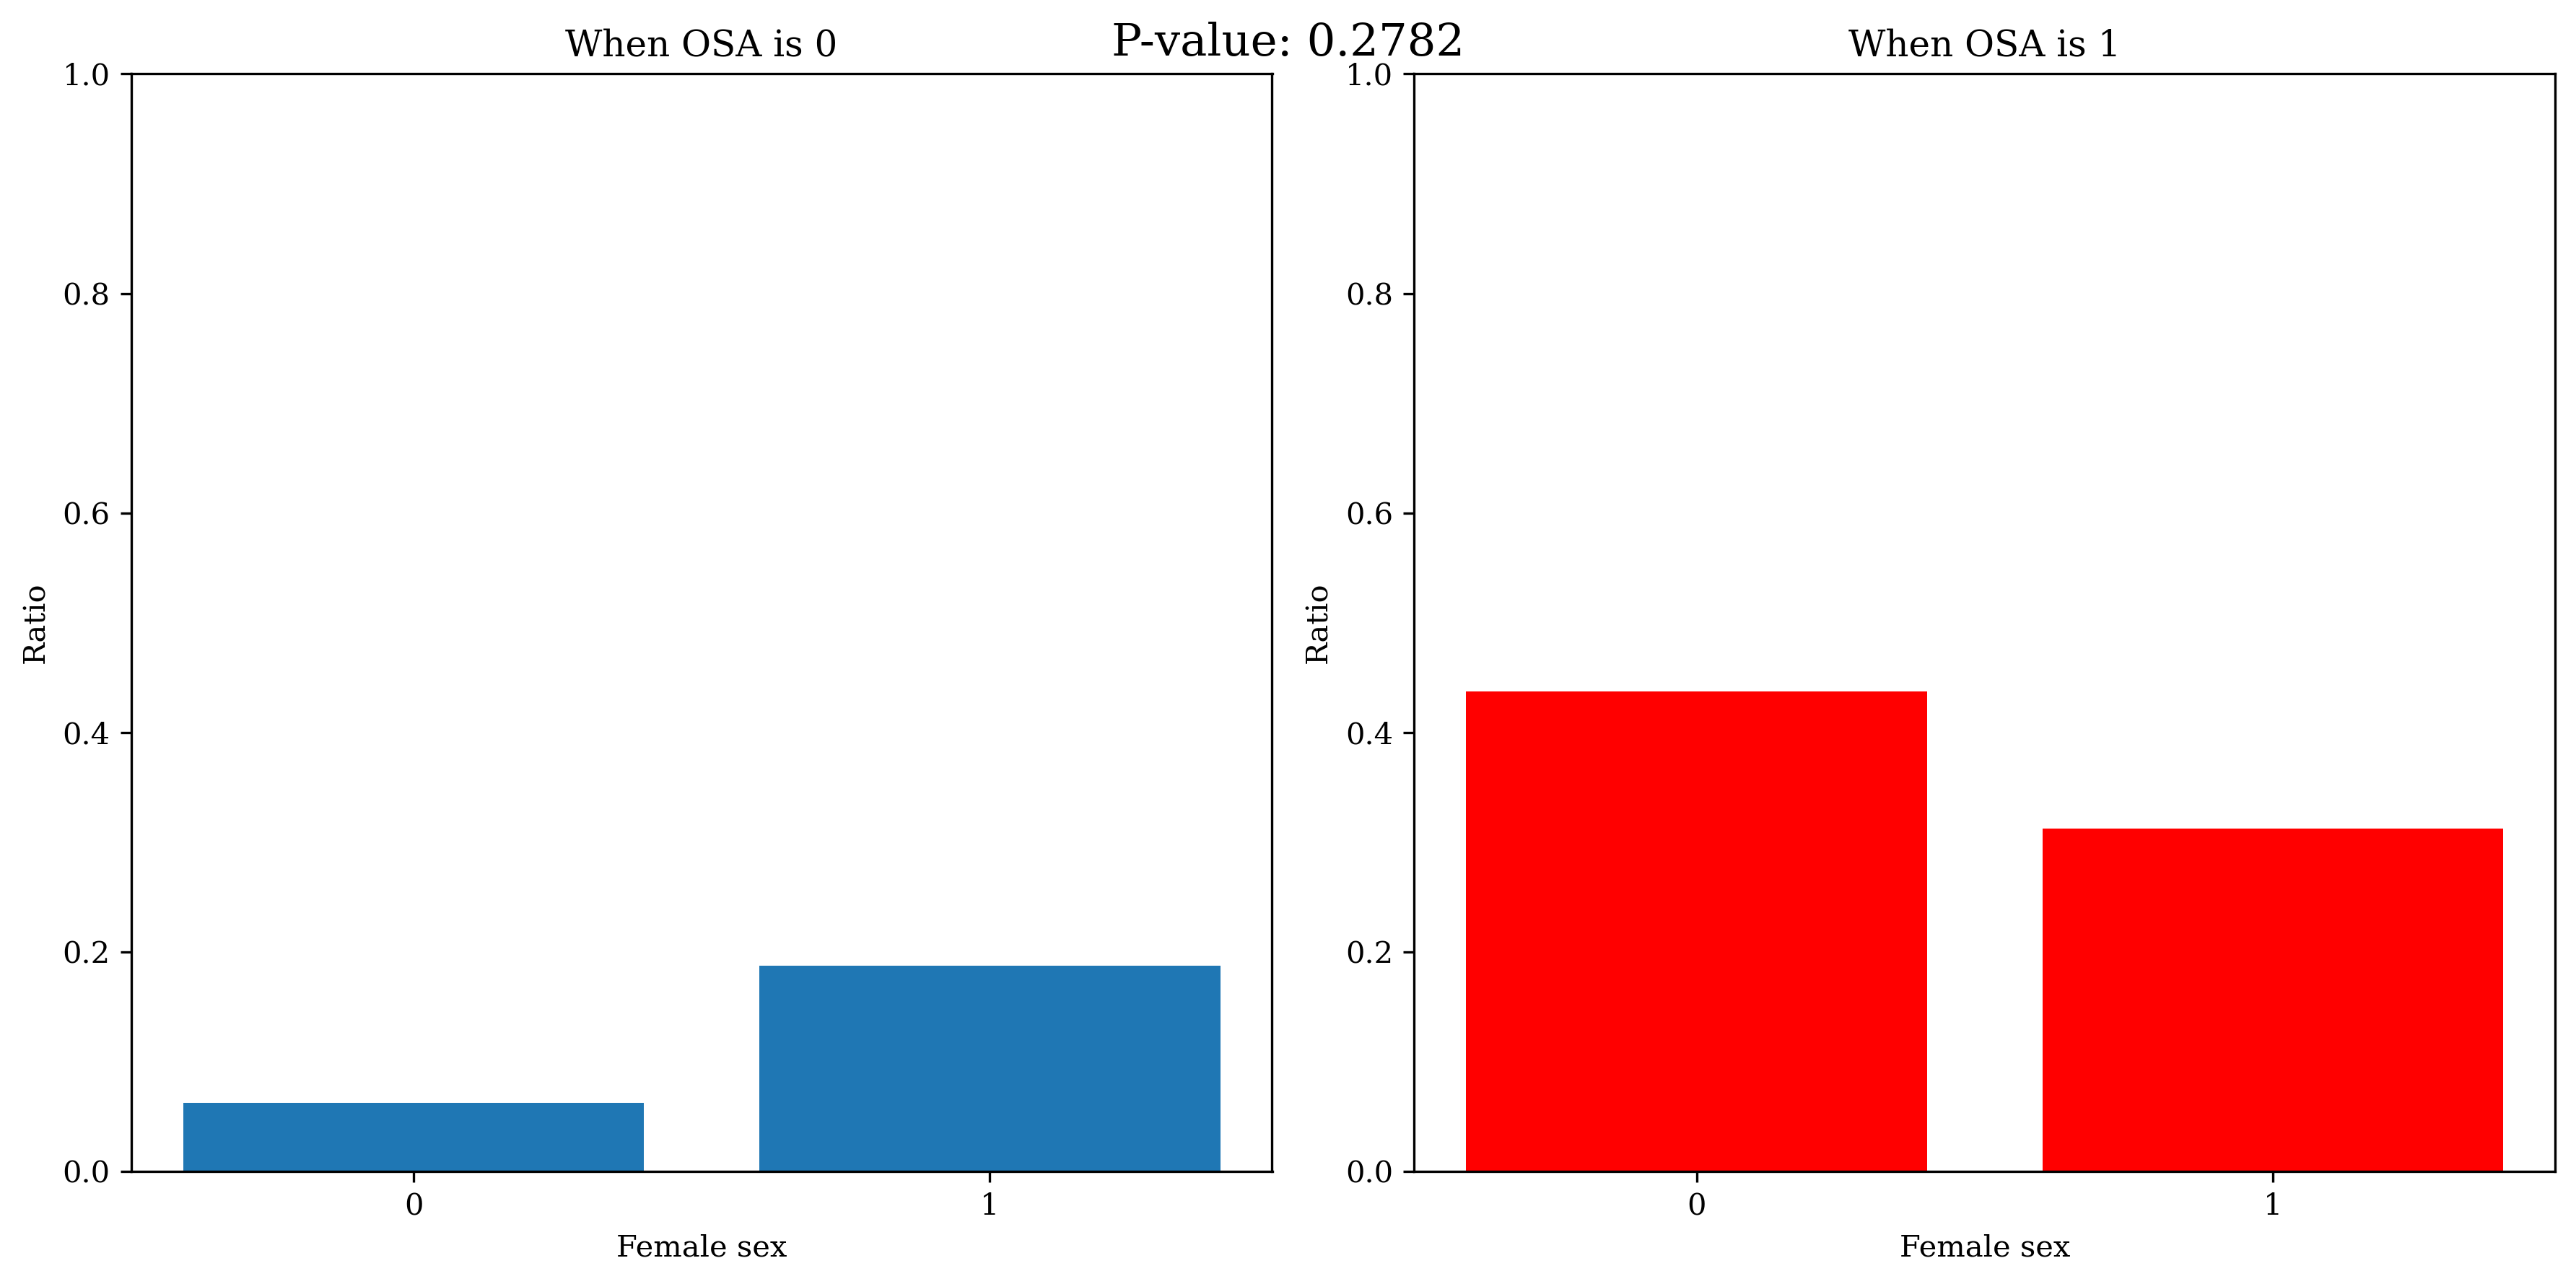

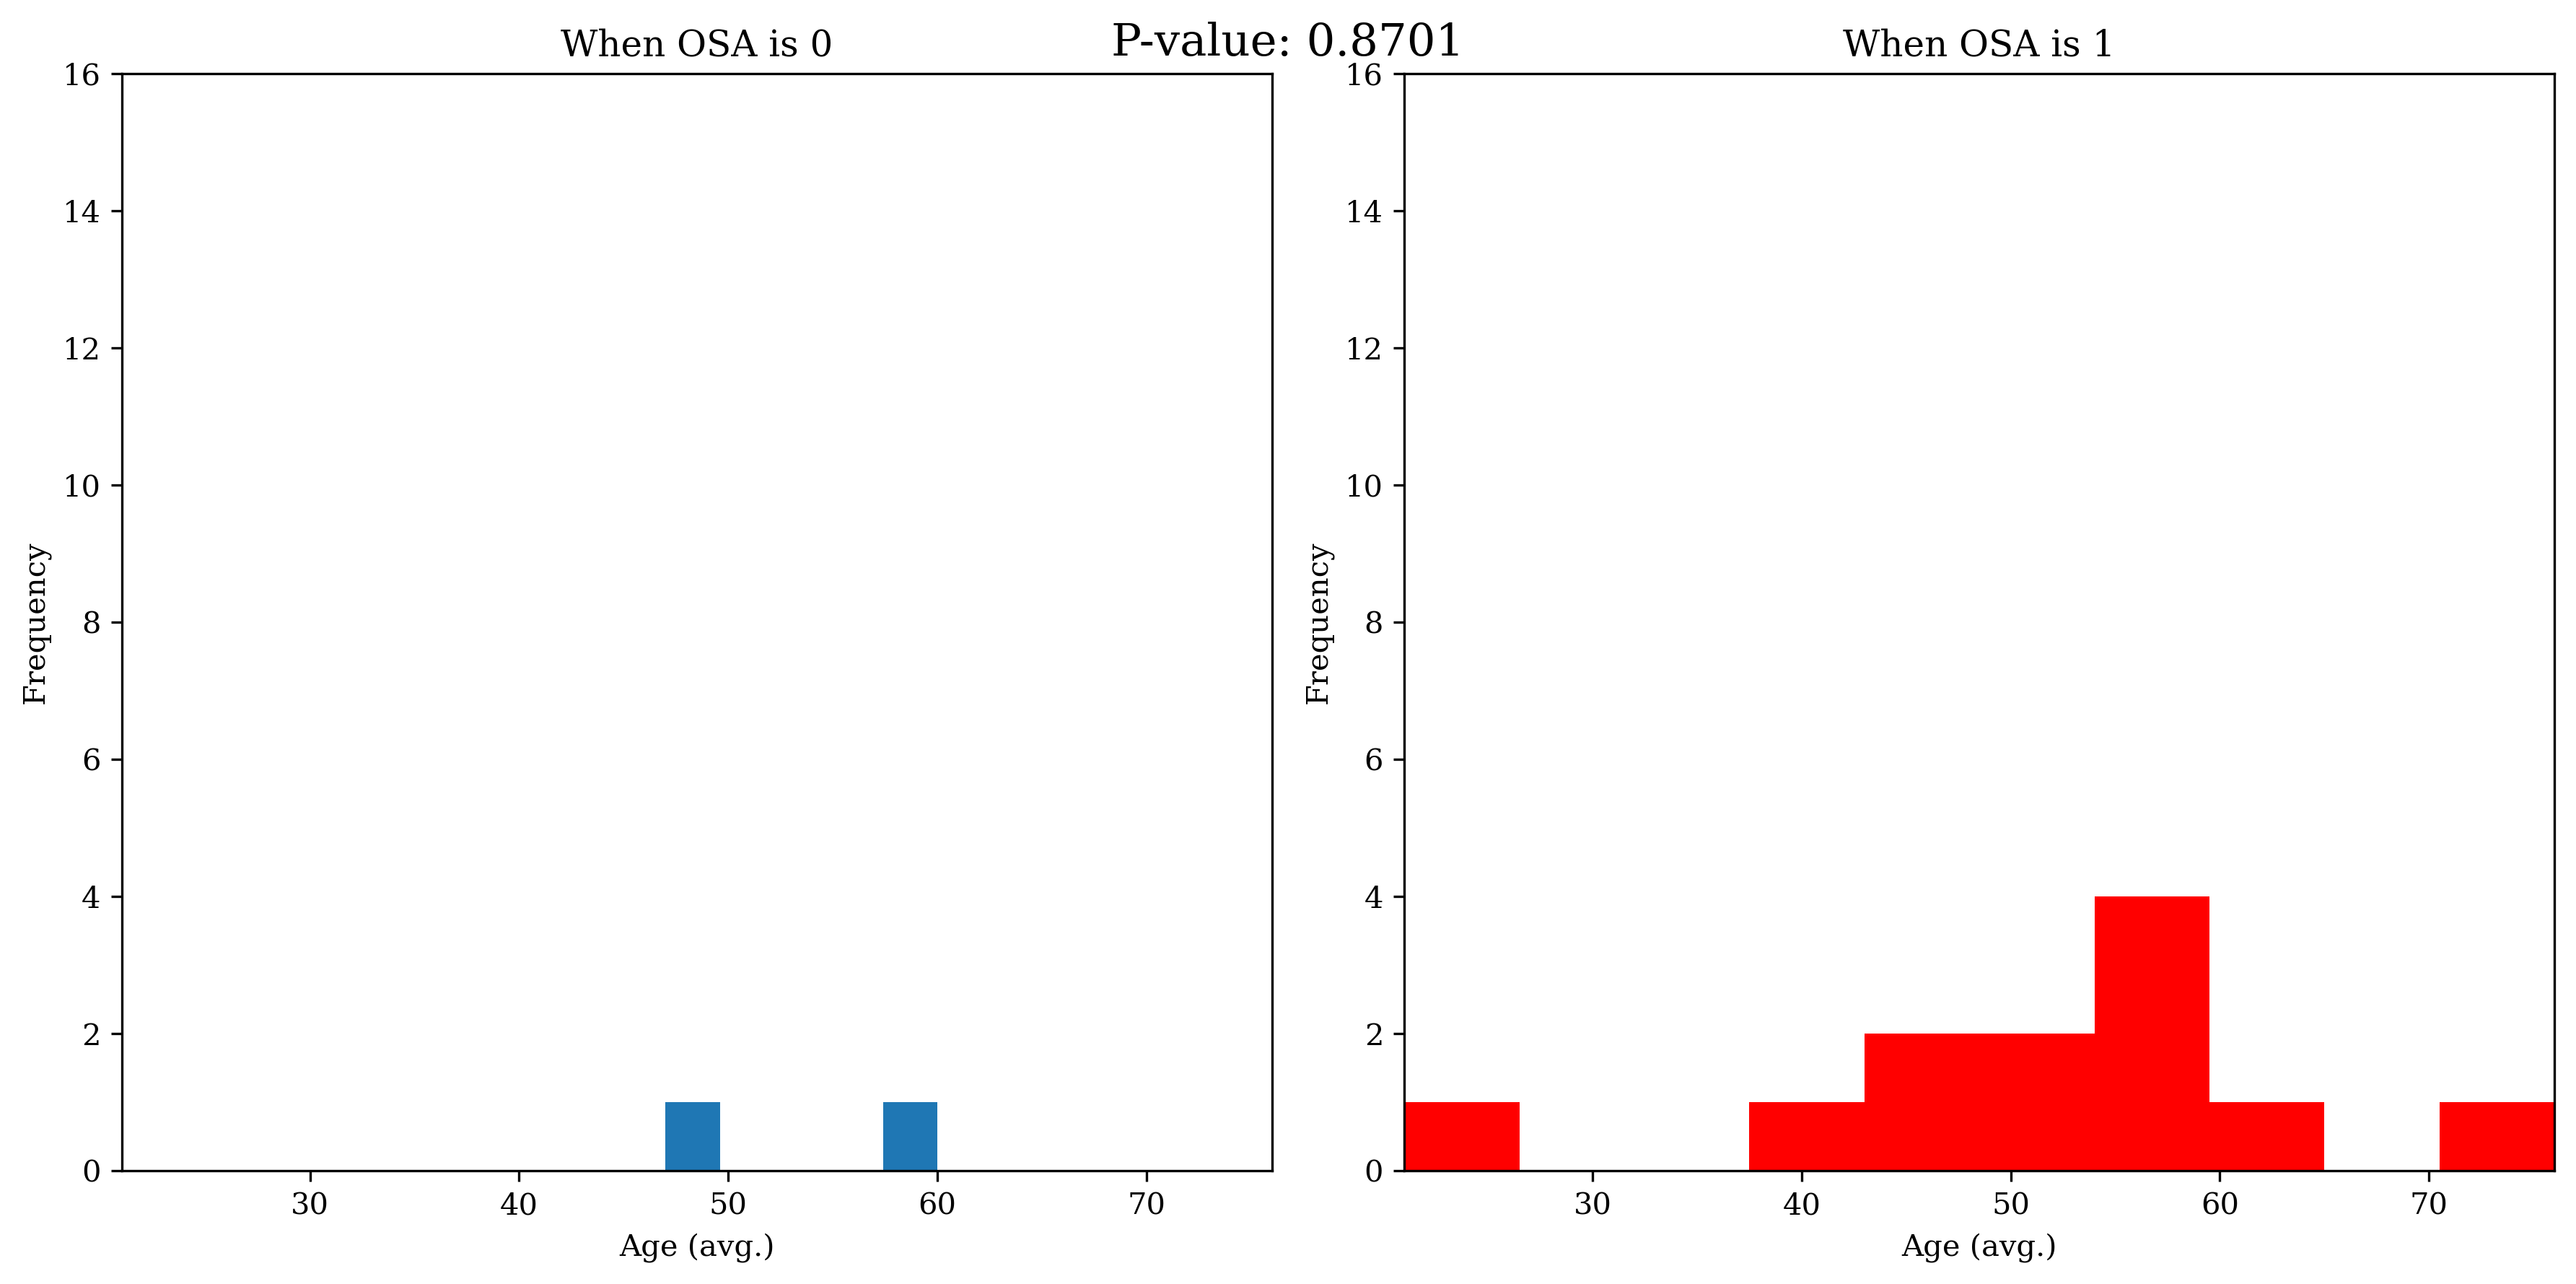

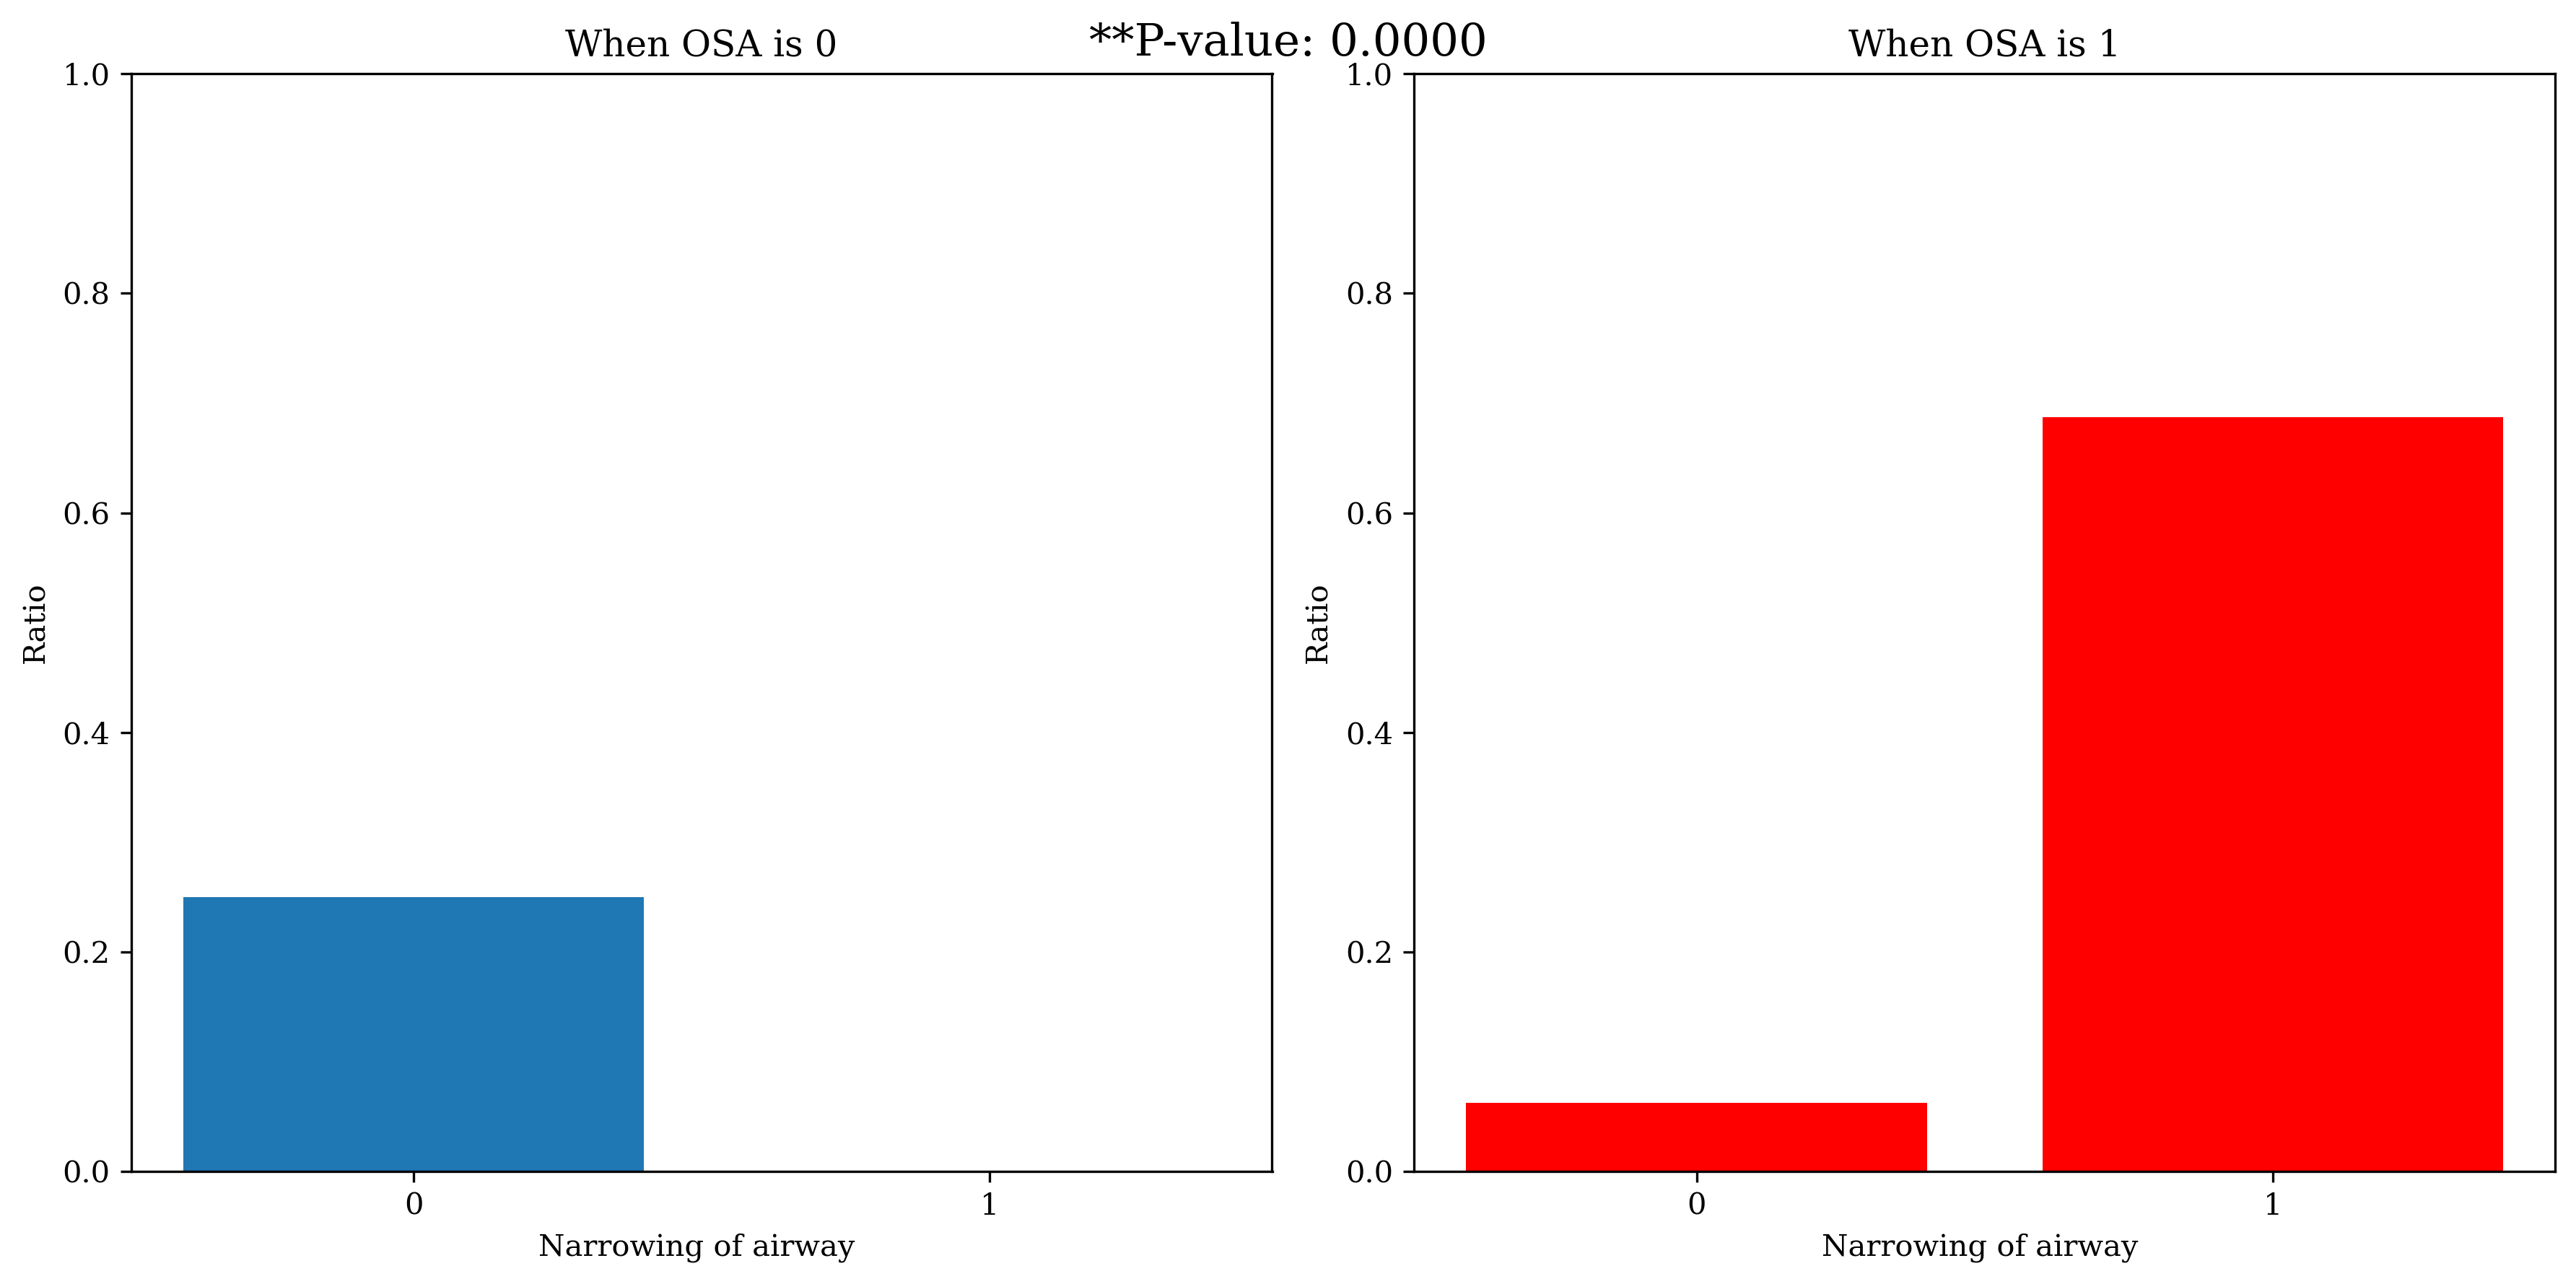

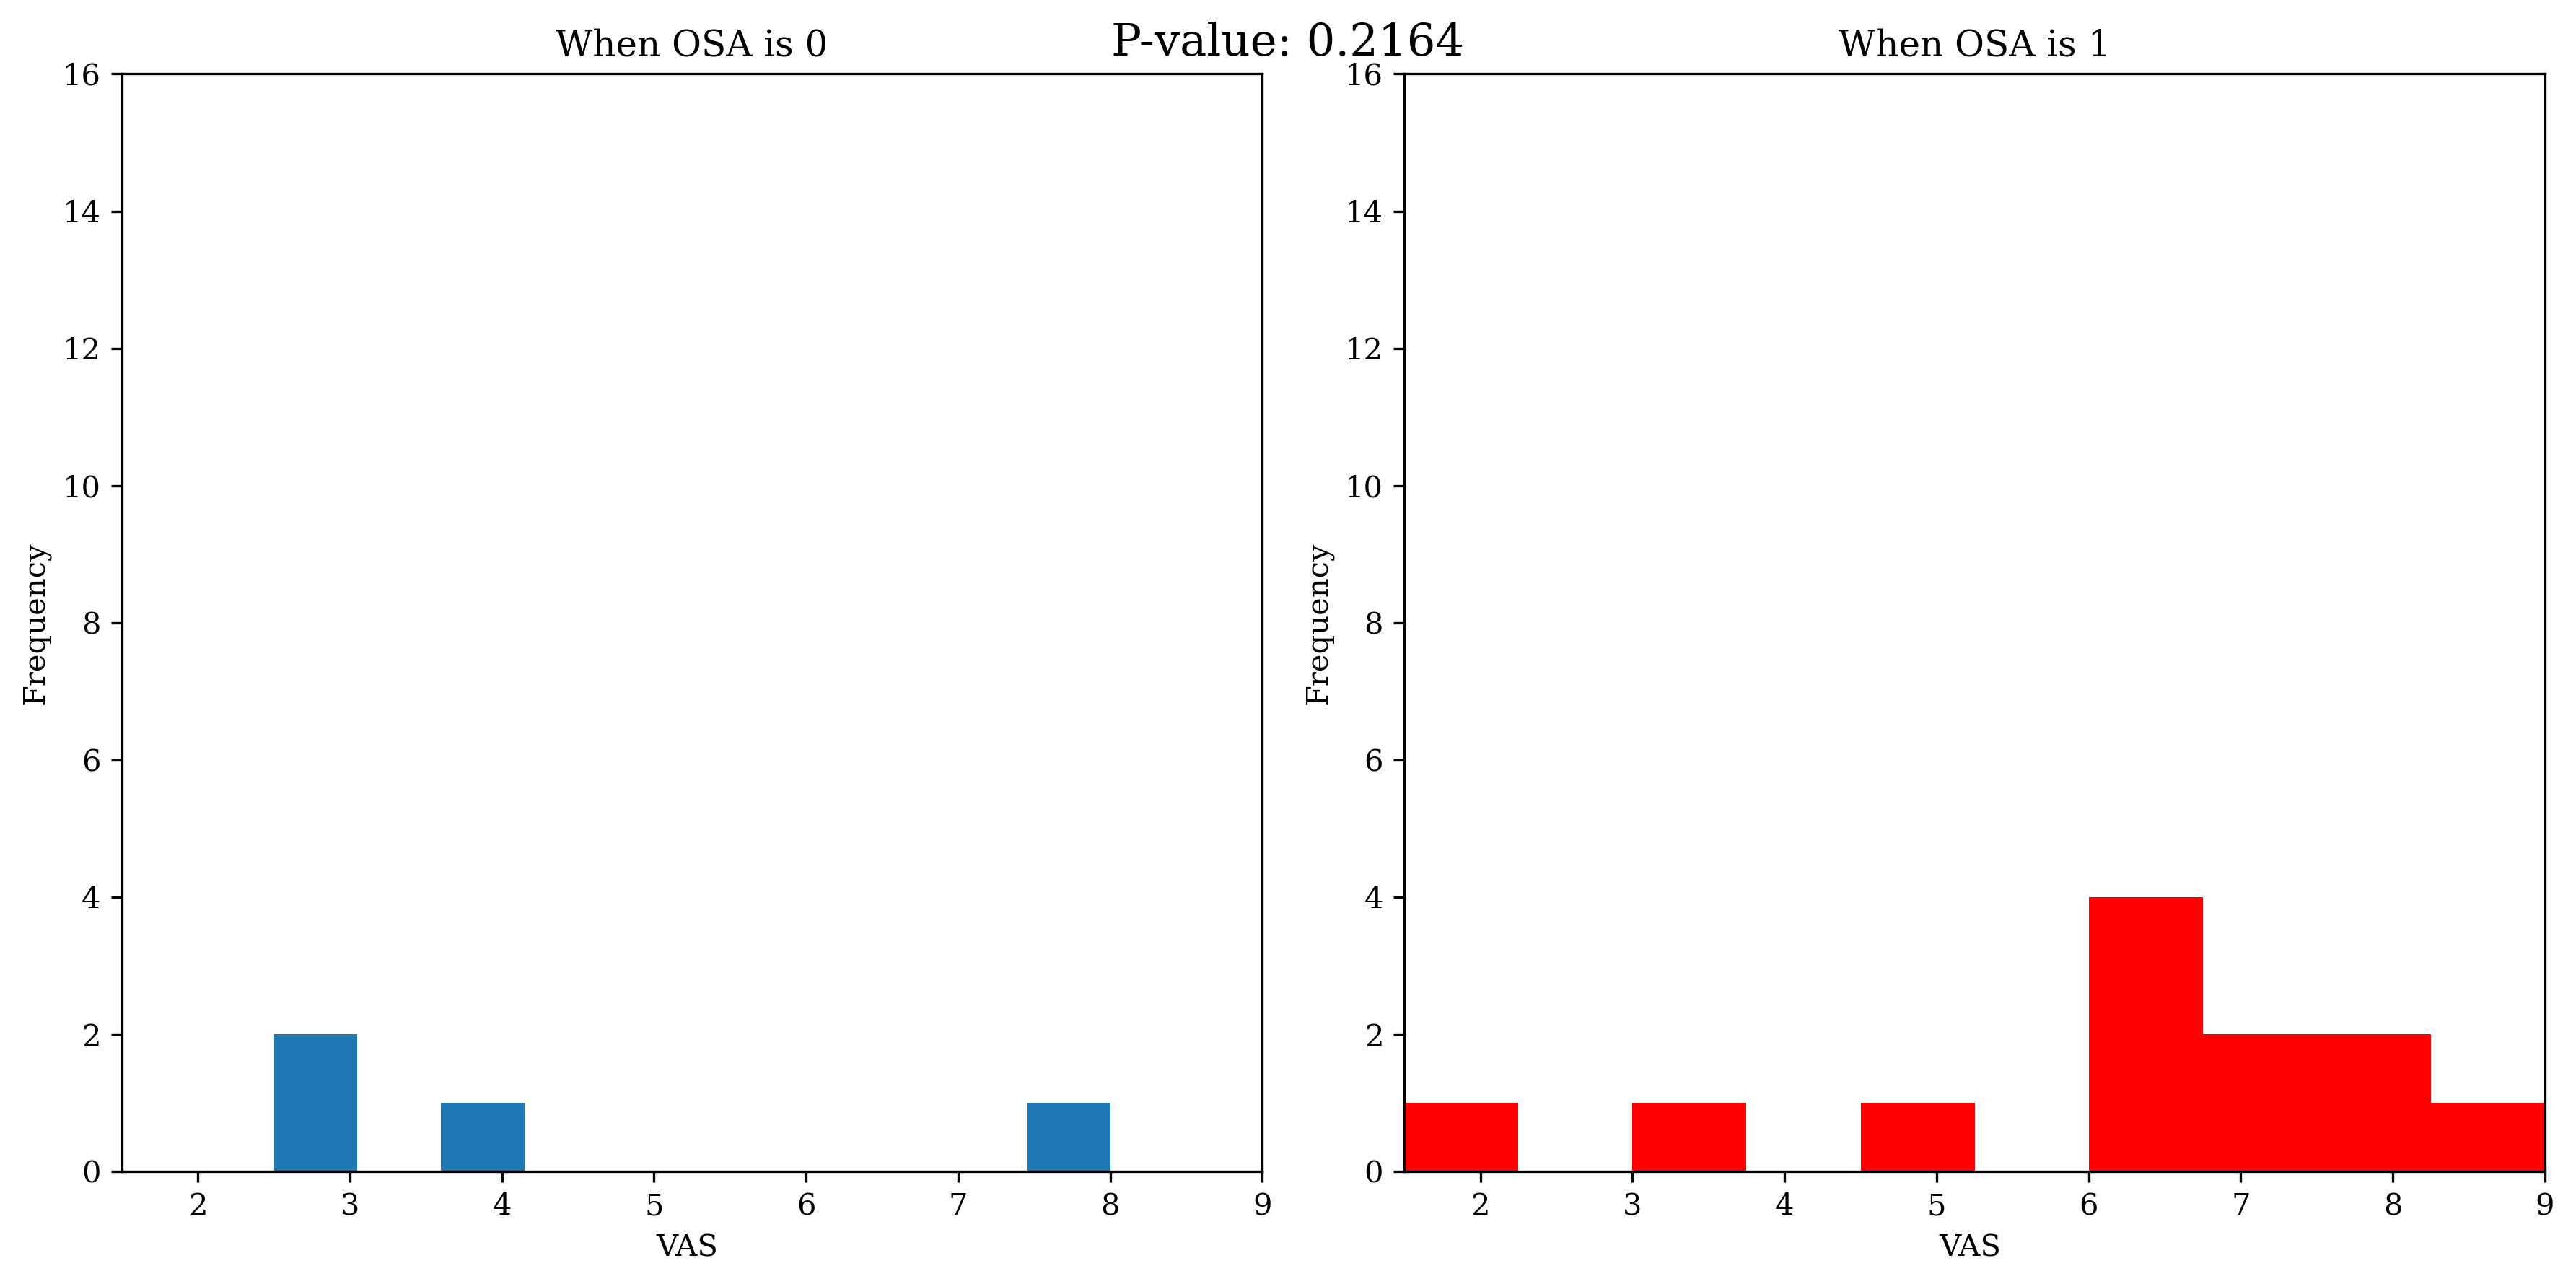

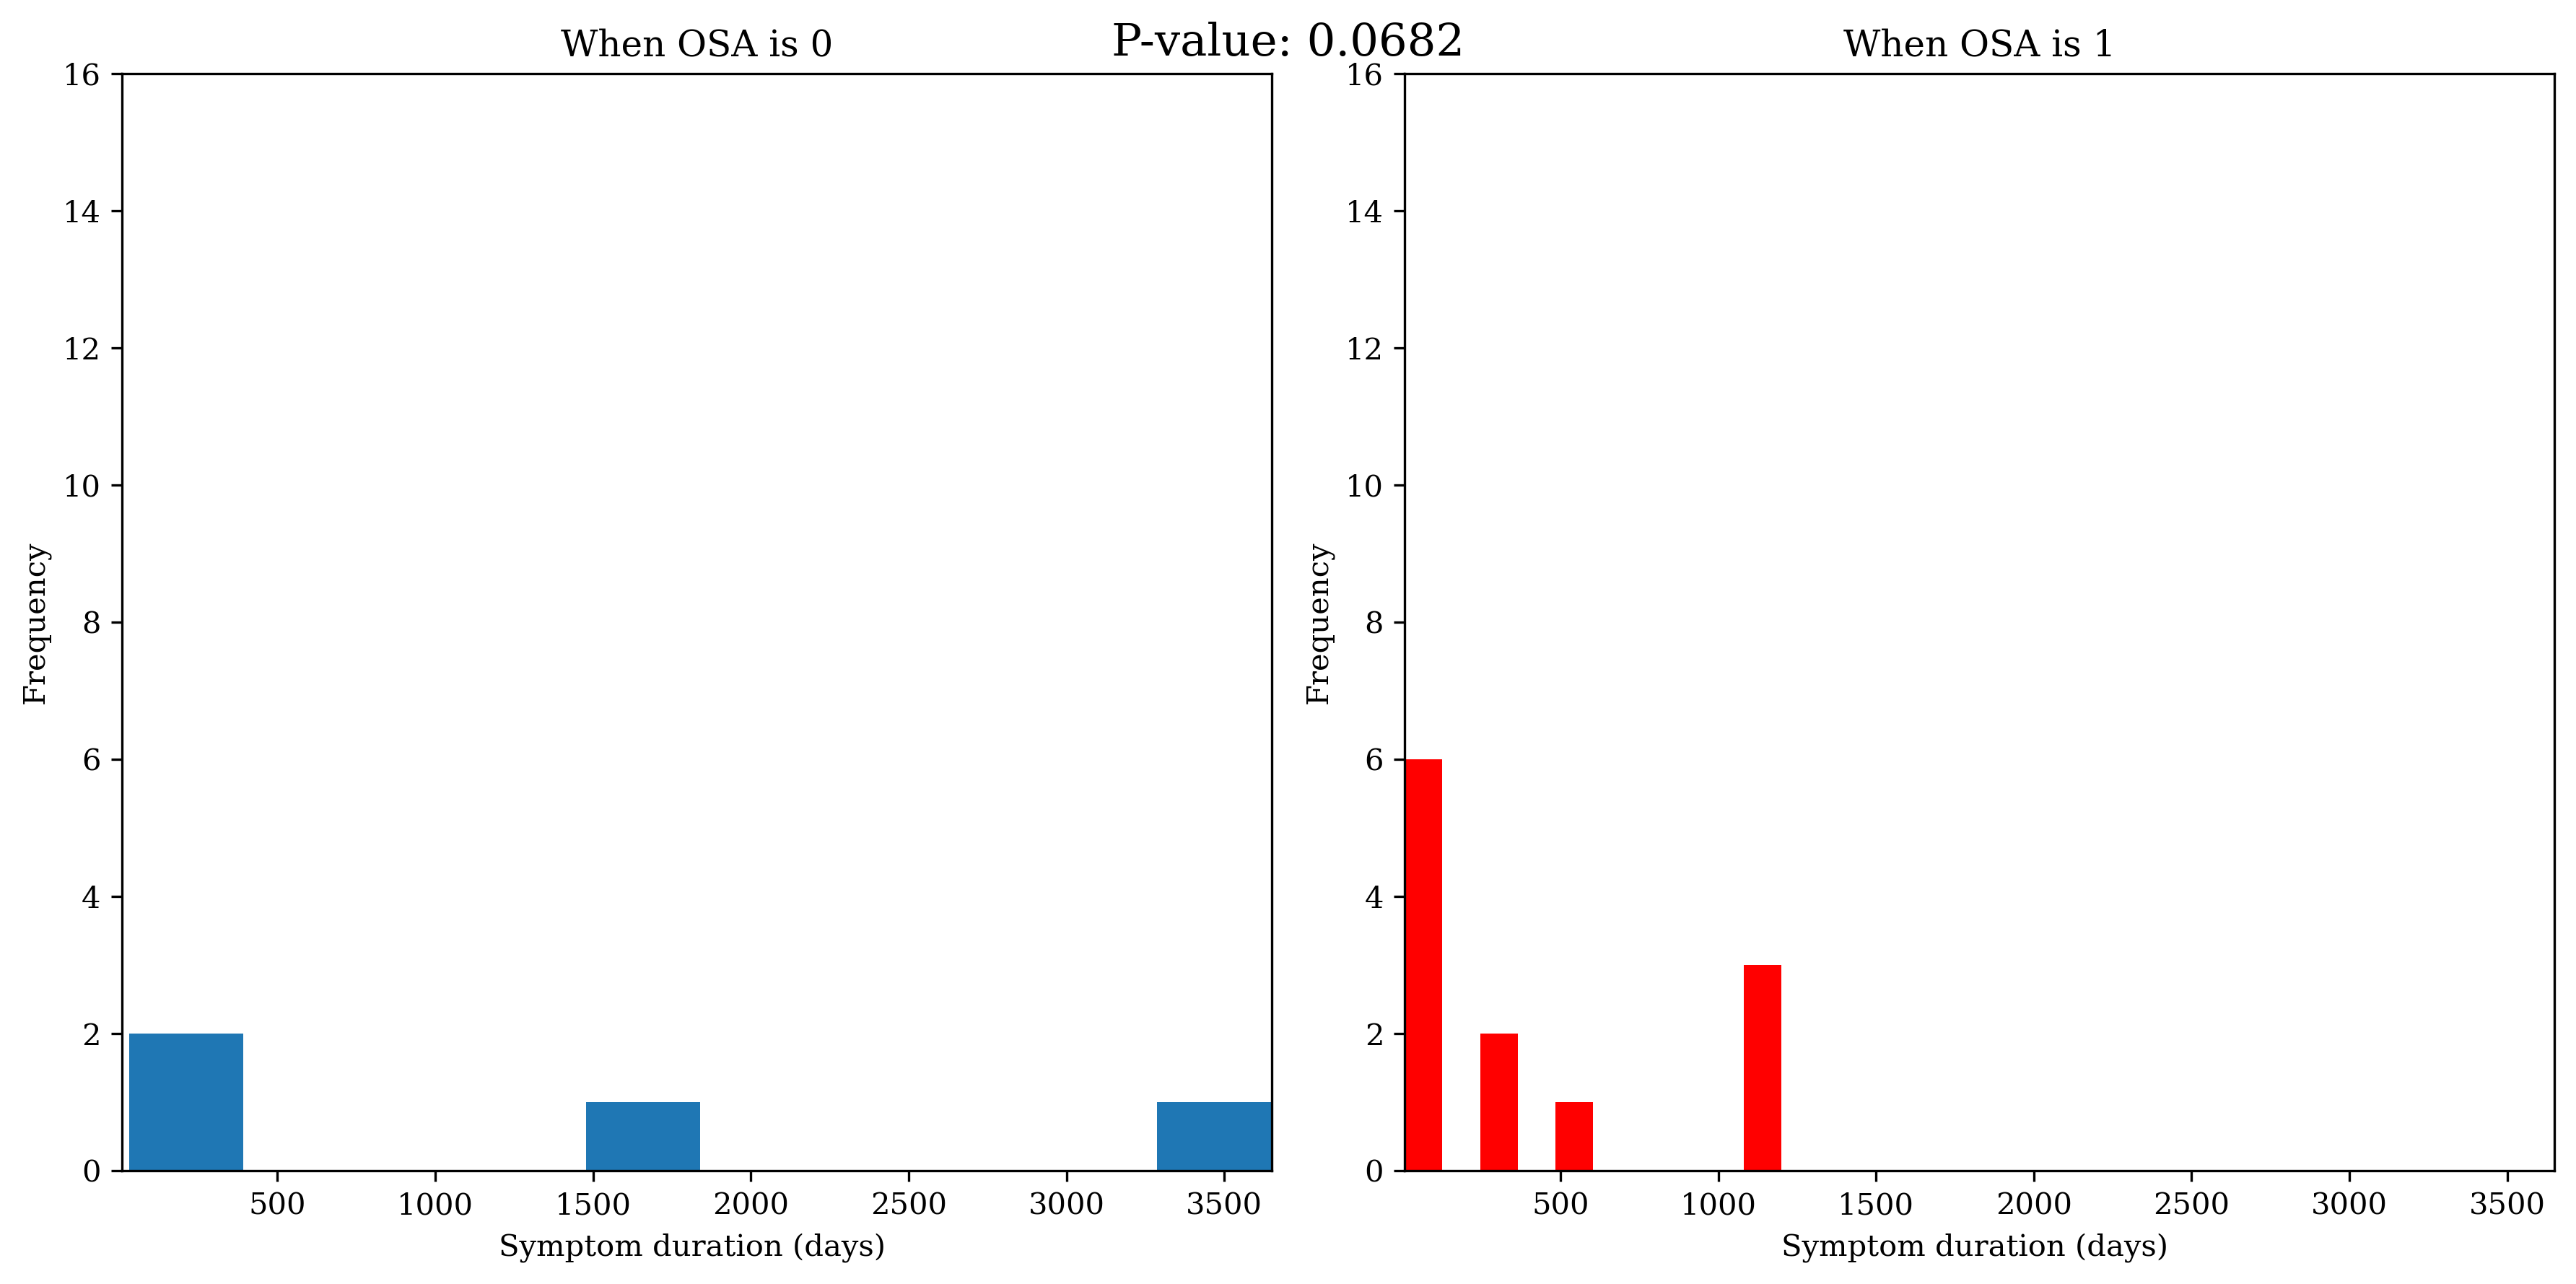

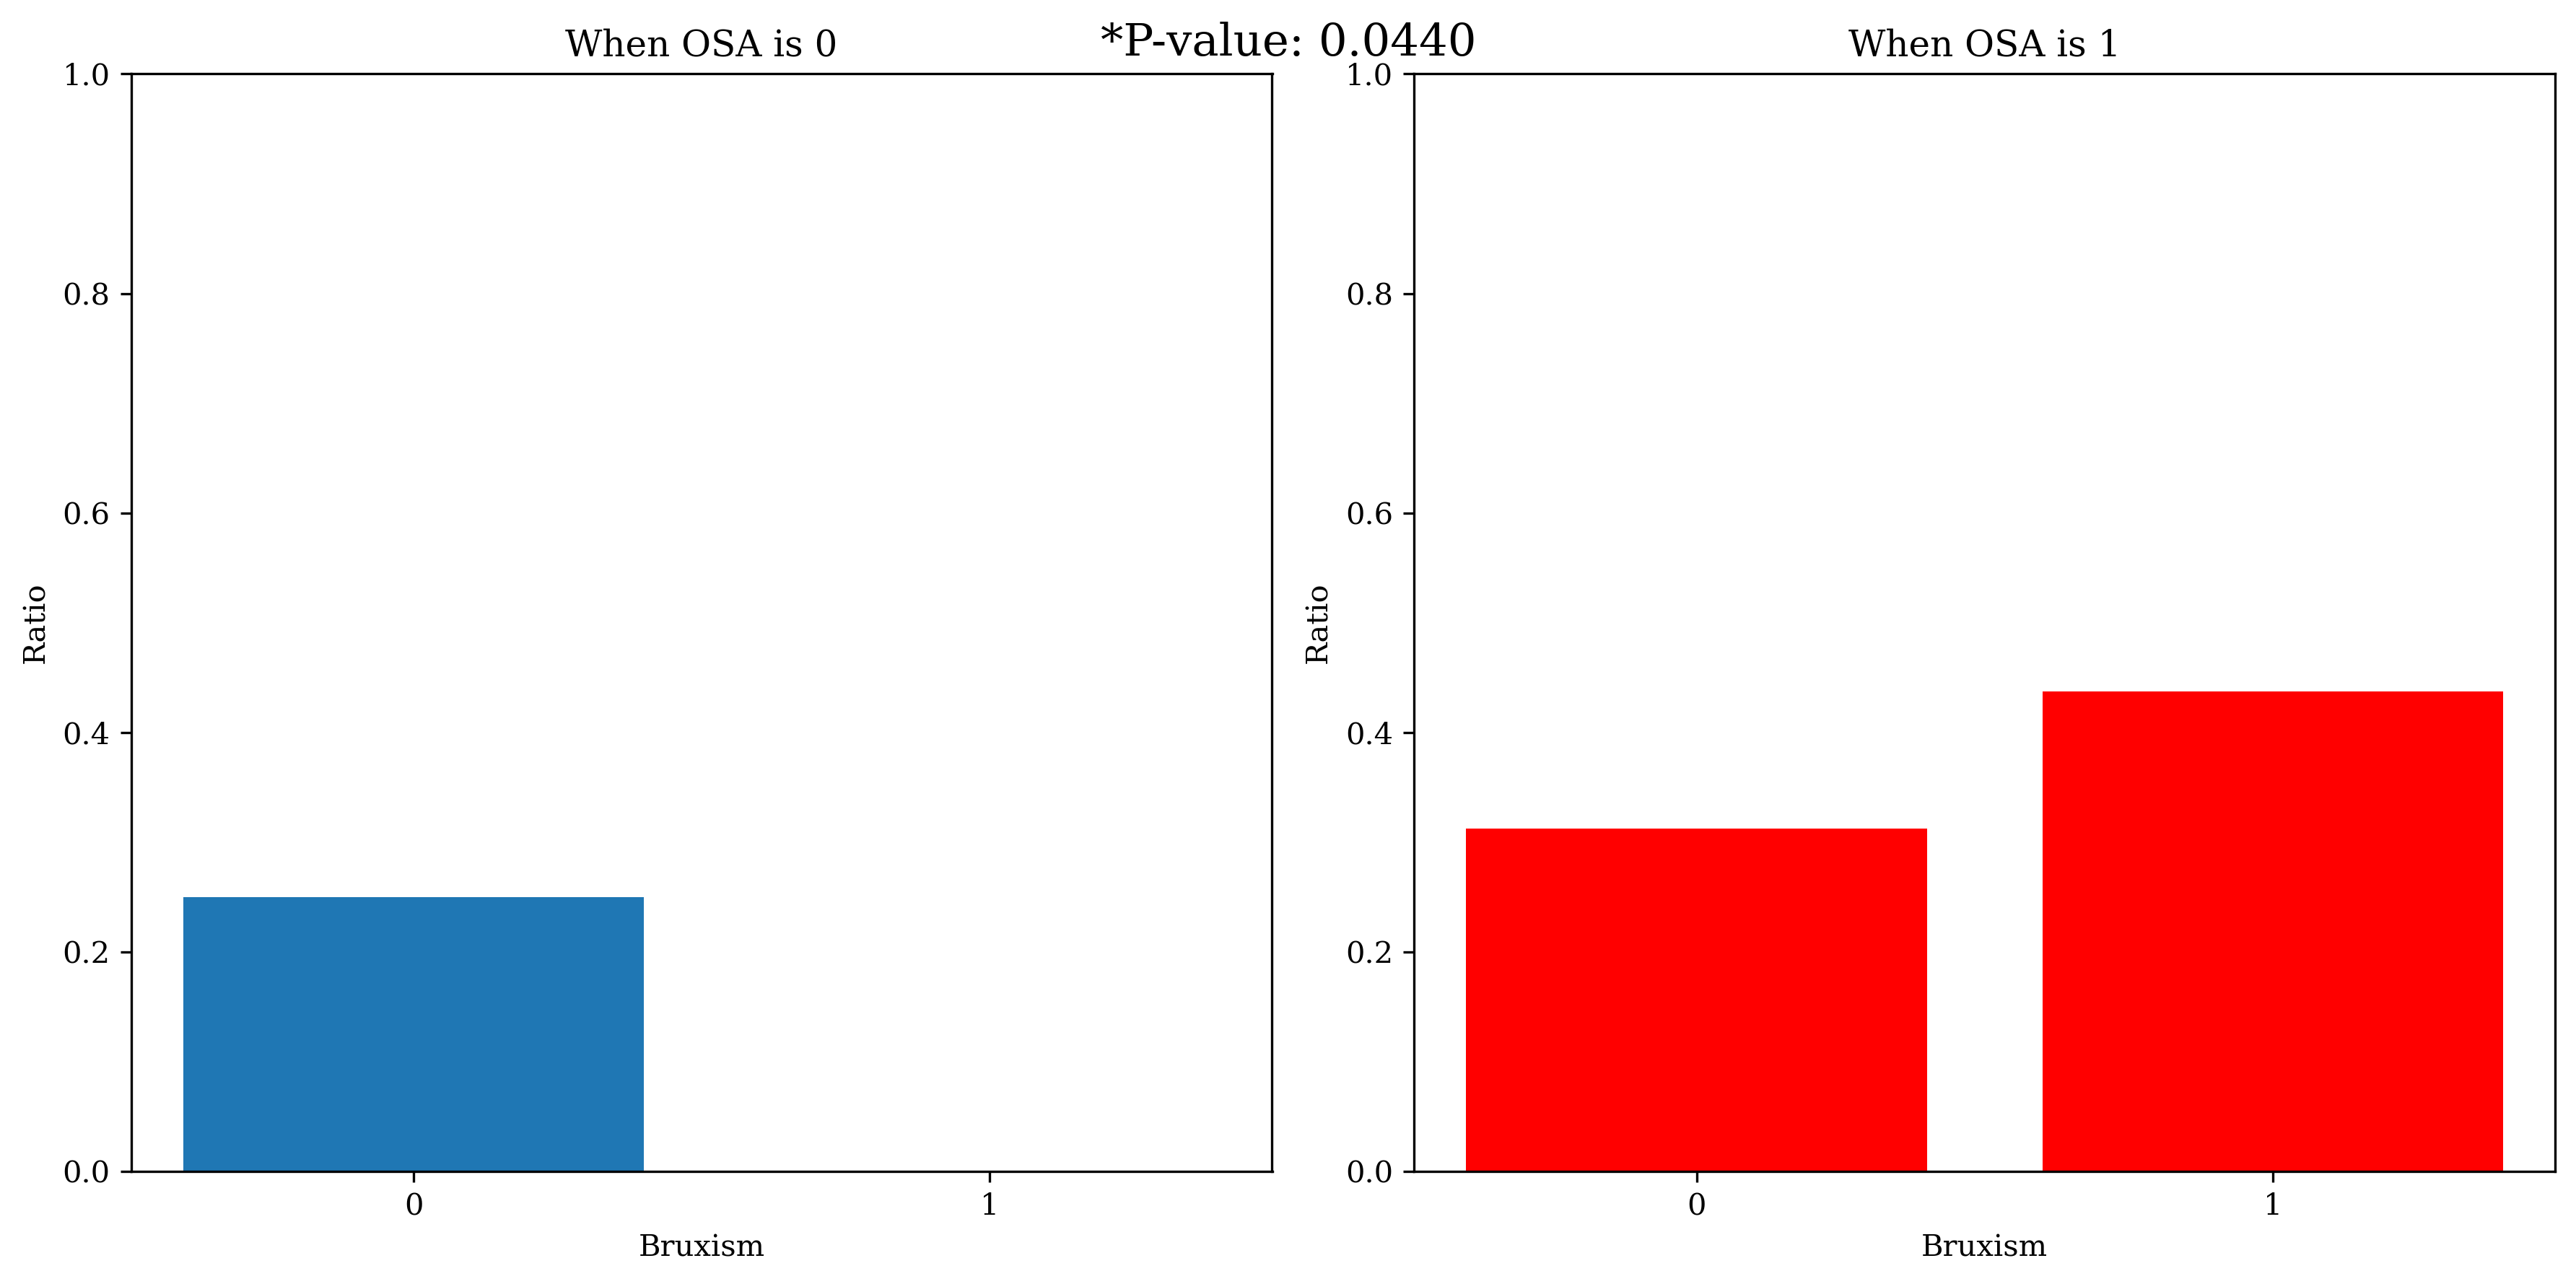


KeyboardInterrupt



Error in callback <function flush_figures at 0x7fc724a1c700> (for post_execute):



KeyboardInterrupt



In [46]:
#주요인자. ....

#OSA가 0인 경우의 인자의 분포와 1인 경우의 인자의 분포를 비교해볼 수 있을 것....

analyze_features = df.columns[2:]
len_feature_values = len(analyze_features)

for i, feature in enumerate(analyze_features):
    plt.figure(figsize = (12,6), dpi = 300)
    
    feature_values = df[feature].dropna().values
    n_data = len(feature_values)
    
    feature_with_OSA_0 = df[df['OSA'] == 0][feature].dropna().values
    feature_with_OSA_1 = df[df['OSA'] == 1][feature].dropna().values

    plt.subplot(1, 2, 1)
    plt.title(f'When OSA is 0')

    if len(set(feature_values)) <= 2:
        plt.bar(list(set(feature_values)), [(feature_with_OSA_0 == 0).sum()/n_data, (feature_with_OSA_0 == 1).sum()/n_data])
        plt.xticks(list(set(feature_values)))
        plt.ylabel('Ratio', size=10)
        plt.ylim(0, 1)
    
    else:
        plt.hist(feature_with_OSA_0)
        plt.xlim(feature_values.min(), feature_values.max())
        plt.ylabel('Frequency', size=10)
        plt.ylim(0, n_data)

    plt.xlabel(feature, size=10)

    plt.subplot(1, 2, 2)
    plt.title(f'When OSA is 1')

    if len(set(feature_values)) <= 2:
        plt.bar(list(set(feature_values)), [(feature_with_OSA_1 == 0).sum()/n_data, (feature_with_OSA_1 == 1).sum()/n_data], color='red')
        plt.xticks(list(set(feature_values)))
        plt.ylabel('Ratio', size=10)
        plt.ylim(0, 1)
        
    else:
        plt.hist(feature_with_OSA_1, color='red')
        plt.xlim(feature_values.min(), feature_values.max())
        plt.ylabel('Frequency', size=10)
        plt.ylim(0, n_data)
        
    plt.xlabel(feature, size=10)
    plt.tight_layout()
    
    # P-value 계산
    p_value = ttest_ind(feature_with_OSA_0, feature_with_OSA_1).pvalue
    p_value_label = f'P-value: {p_value:.4f}'
    if p_value < 0.01:
        p_value_label = '**' + p_value_label
    elif p_value < 0.05:
        p_value_label = '*' + p_value_label
        
    plt.suptitle(p_value_label, size = 15)
    
    plt.savefig(f'./Figures/Feature_analysis/{feature}.png')
    plt.show()

# Ridge regression with all featrues

In [47]:
columns = df.columns[2:]
columns

Index(['Female sex', 'Age (avg.)', 'Narrowing of airway ', 'VAS ',
       'Symptom duration (days) ', 'Bruxism', 'Headache', 'Stress', 'Tinnitus',
       'Macrotrauma hx.', 'Height\n(cm)', 'Weight\n(cm)', 'BMI', 'REI', 'OAI',
       'CAI', 'Minimum desaturation', 'O-C', 'I-S', 'DEP', 'ANX', 'HOS',
       'PHOB', 'PAR', 'PSY', 'MRI narrowing'],
      dtype='object')

OSA shape :  (16, 26), (16, 1)


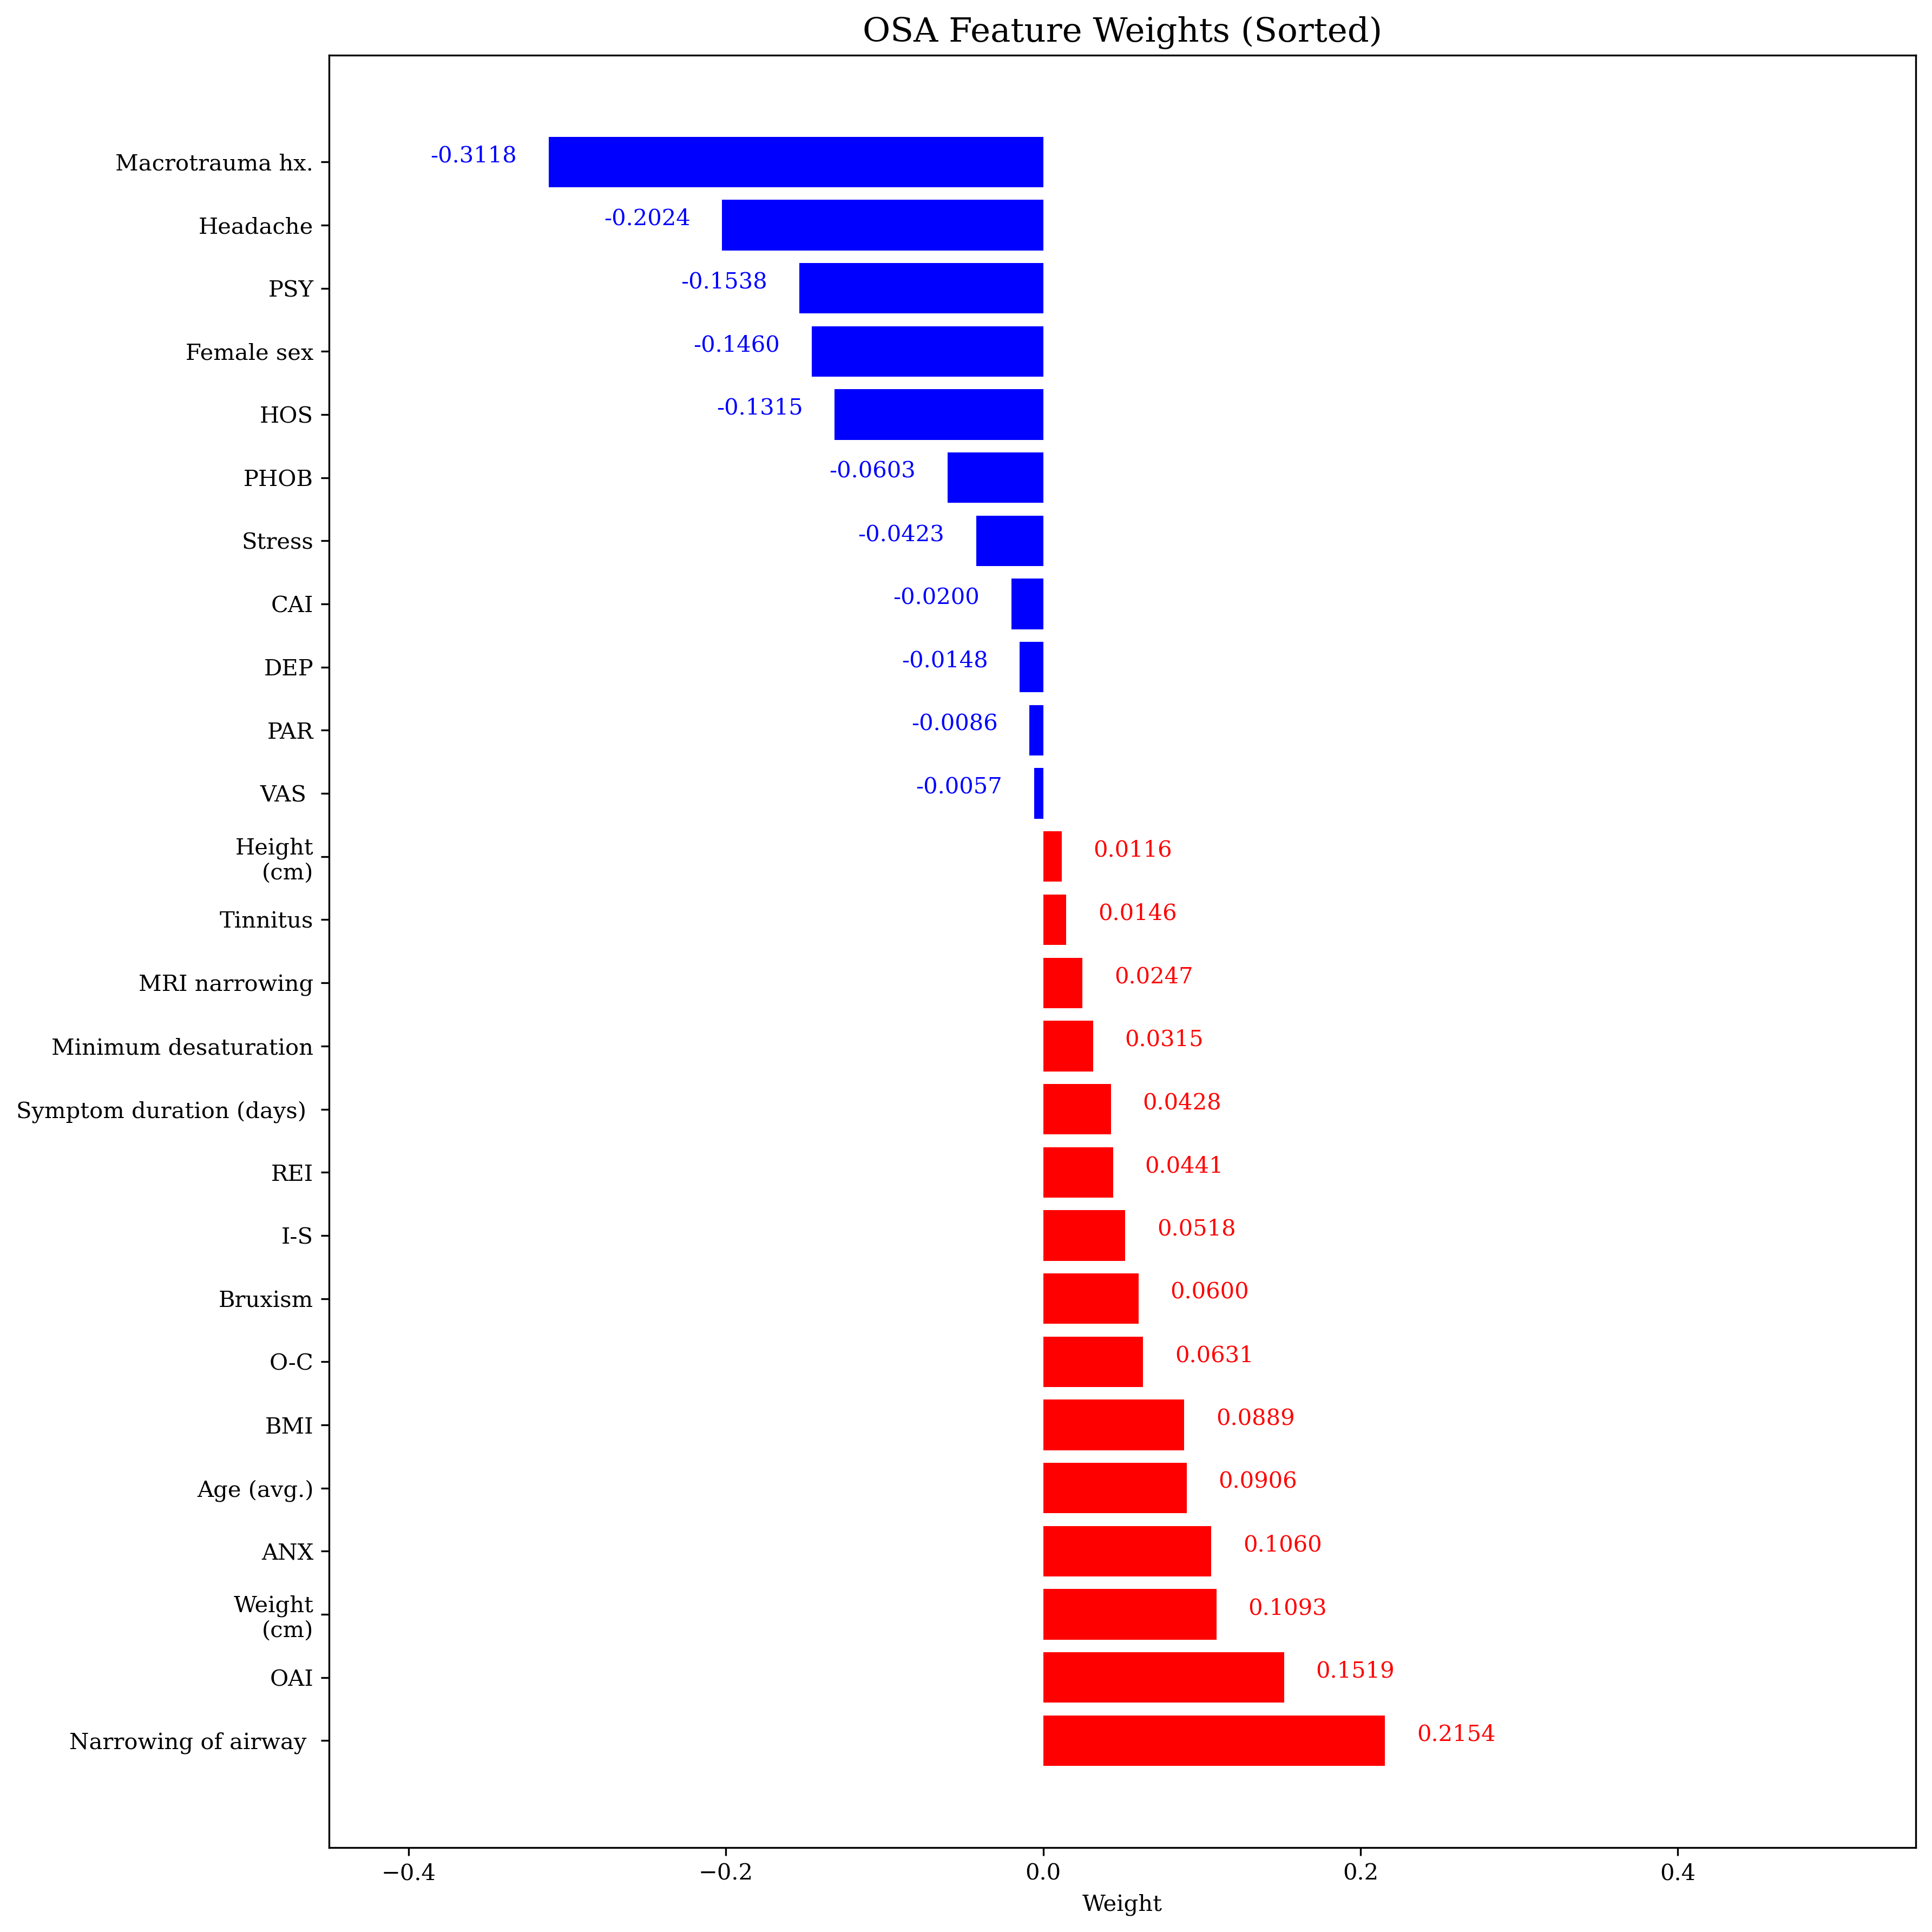

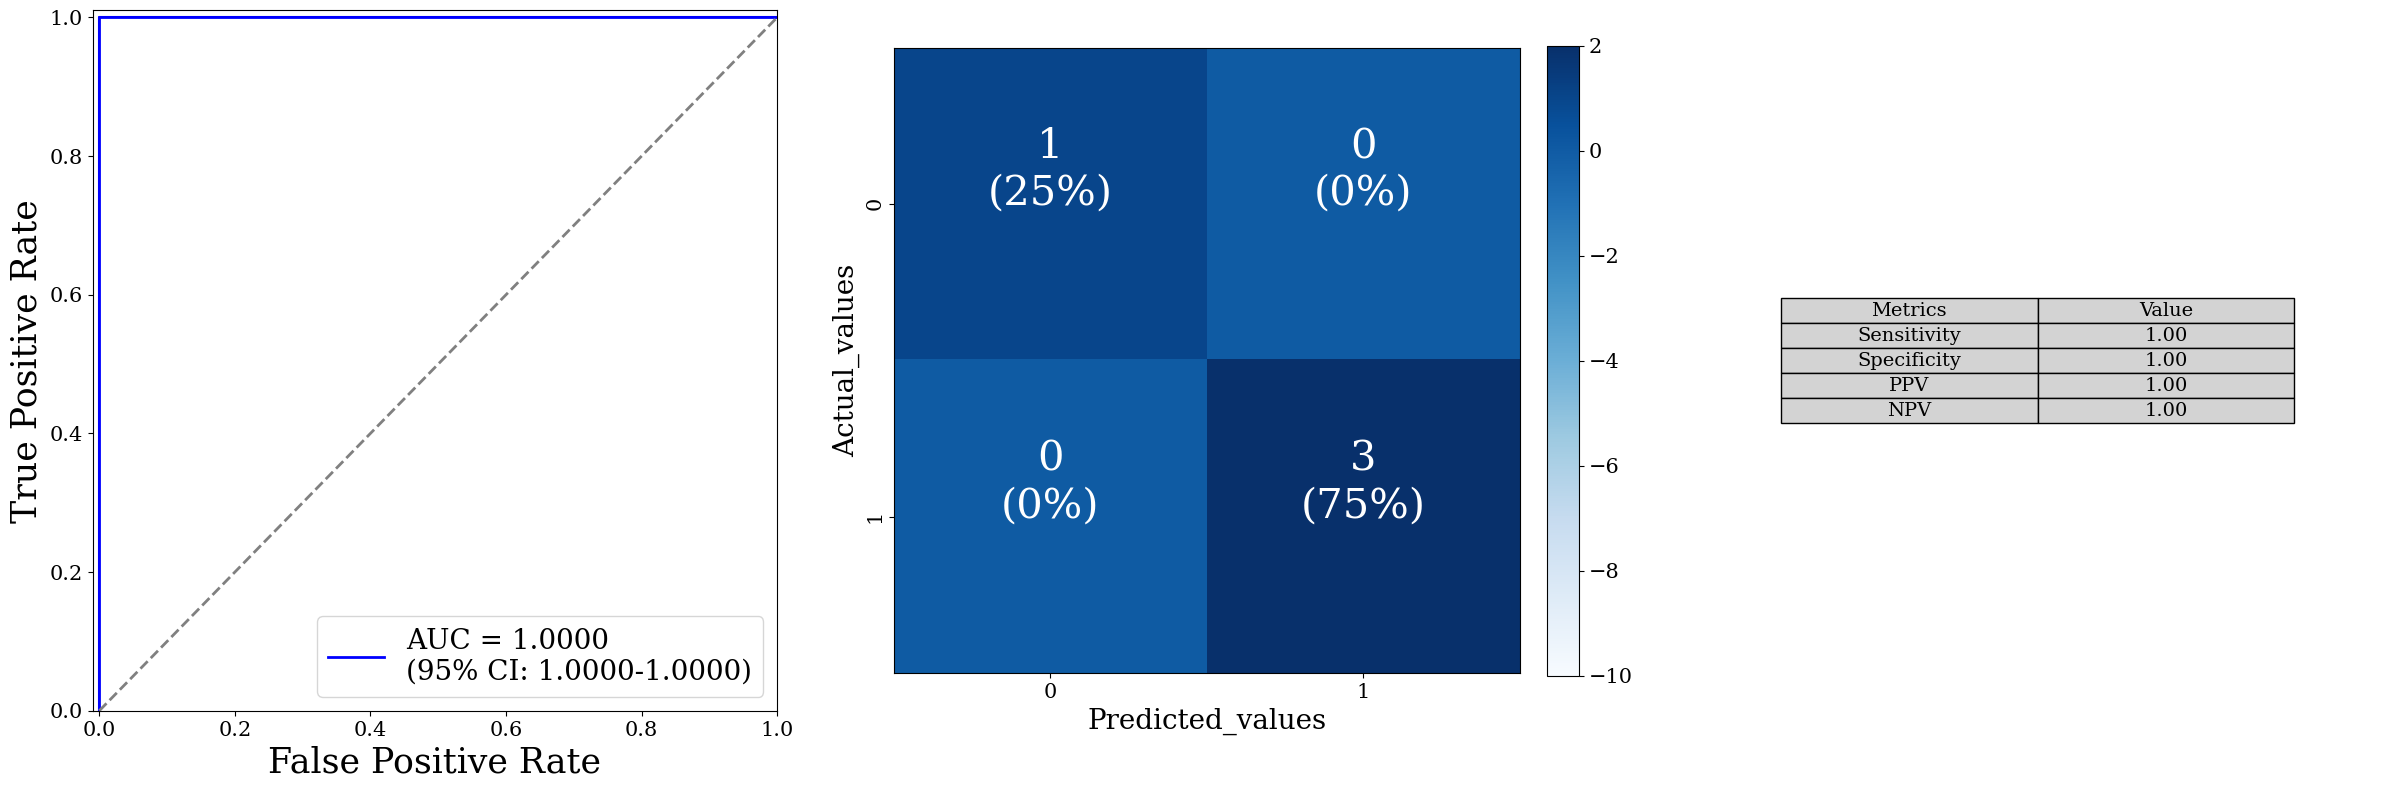

In [48]:
data = df.values[:,1:]
OSA_y = data[:,0][:,None]
OSA_x = data[:,1:]

print(f'''OSA shape :  {OSA_x.shape}, {OSA_y.shape}''')

length = len(OSA_x)
train_end = int(length * 0.8)

# 데이터 분할
OSA_x_train, OSA_x_test, OSA_y_train, OSA_y_test = train_test_split(OSA_x, OSA_y, test_size=0.2, random_state=42, stratify=OSA_y)
                
scaler = StandardScaler()
OSA_x_train = scaler.fit_transform(OSA_x_train)
OSA_x_test = scaler.transform(OSA_x_test)

# Logistic Regression 모델 초기화 및 훈련
#OSA_model = LogisticRegression(penalty = 'l2')
OSA_model = RidgeClassifier(alpha=1.0)
OSA_model.fit(OSA_x_train, OSA_y_train)

# 예측
OSA_y_pred = OSA_model.predict(OSA_x_test)

# Feature의 가중치 가져오기
OSA_weights = OSA_model.coef_[0]

# Weight를 내림차순으로 정렬한 인덱스
OSA_weight_indices = np.argsort(OSA_weights)[::-1]

# Xerostomia 데이터에 대한 가중치 기준으로 정렬한 그래프
plt.figure(figsize=(12, 12), dpi = 300)

# 각 feature의 가중치를 확인하고 양수인 경우 빨간색, 음수인 경우 파란색으로 표시
colors = ['r' if weight > 0 else 'b' for weight in OSA_weights[OSA_weight_indices]]

# 가중치 값을 표시하기 위한 추가 코드
for i, weight_index in enumerate(OSA_weight_indices):
    if     OSA_weights[weight_index] <= 0 : ha = 'right'
    else : ha = 'left'
    plt.text(OSA_weights[weight_index] + 0.02 if ha is 'left' else OSA_weights[weight_index] - 0.02, i, f'{OSA_weights[weight_index]:.4f}', color=colors[i], ha=ha, size = 10)



plt.barh([columns[i] for i in OSA_weight_indices], OSA_weights[OSA_weight_indices], color=colors)
plt.xlabel('Weight')
plt.xlim(-0.45,0.55)
plt.title('OSA Feature Weights (Sorted)', size = 15)
plt.tight_layout()
plt.savefig('./Figures/OSA_Features_Weights')
plt.show()

# 예측 확률
OSA_y_proba = OSA_model.decision_function(OSA_x_test)

save_path = './Figures/OSA_AUC.png'
plot_confusion_matrix_with_metrics_and_auc(figsize = (24,8), xlabel = 'Predicted_values', ylabel = 'Actual_values', test_y = OSA_y_test[:,0], proba = OSA_y_proba, x_labels=['0','1'], y_labels=['0','1'], title = '', color = 'Blues', save= True, save_path = save_path)    
# AUC 계산
#OSA_auc = roc_auc_score(OSA_y_test, OSA_y_proba)
#print(f'AUC: {OSA_auc:.4f}')

## Getting critical features from the Ridgeclassfier

In [40]:
#critical_columns = columns[[OSA_weight_indices[:4], OSA_weight_indices[-4:]]].ravel()
critical_columns = columns[critical_indexes]
critical_columns
data = df.values[:,1:]
OSA_y = data[:,0][:,None]
OSA_x = data[:,1:]

## scatter plot between features with colored OSA

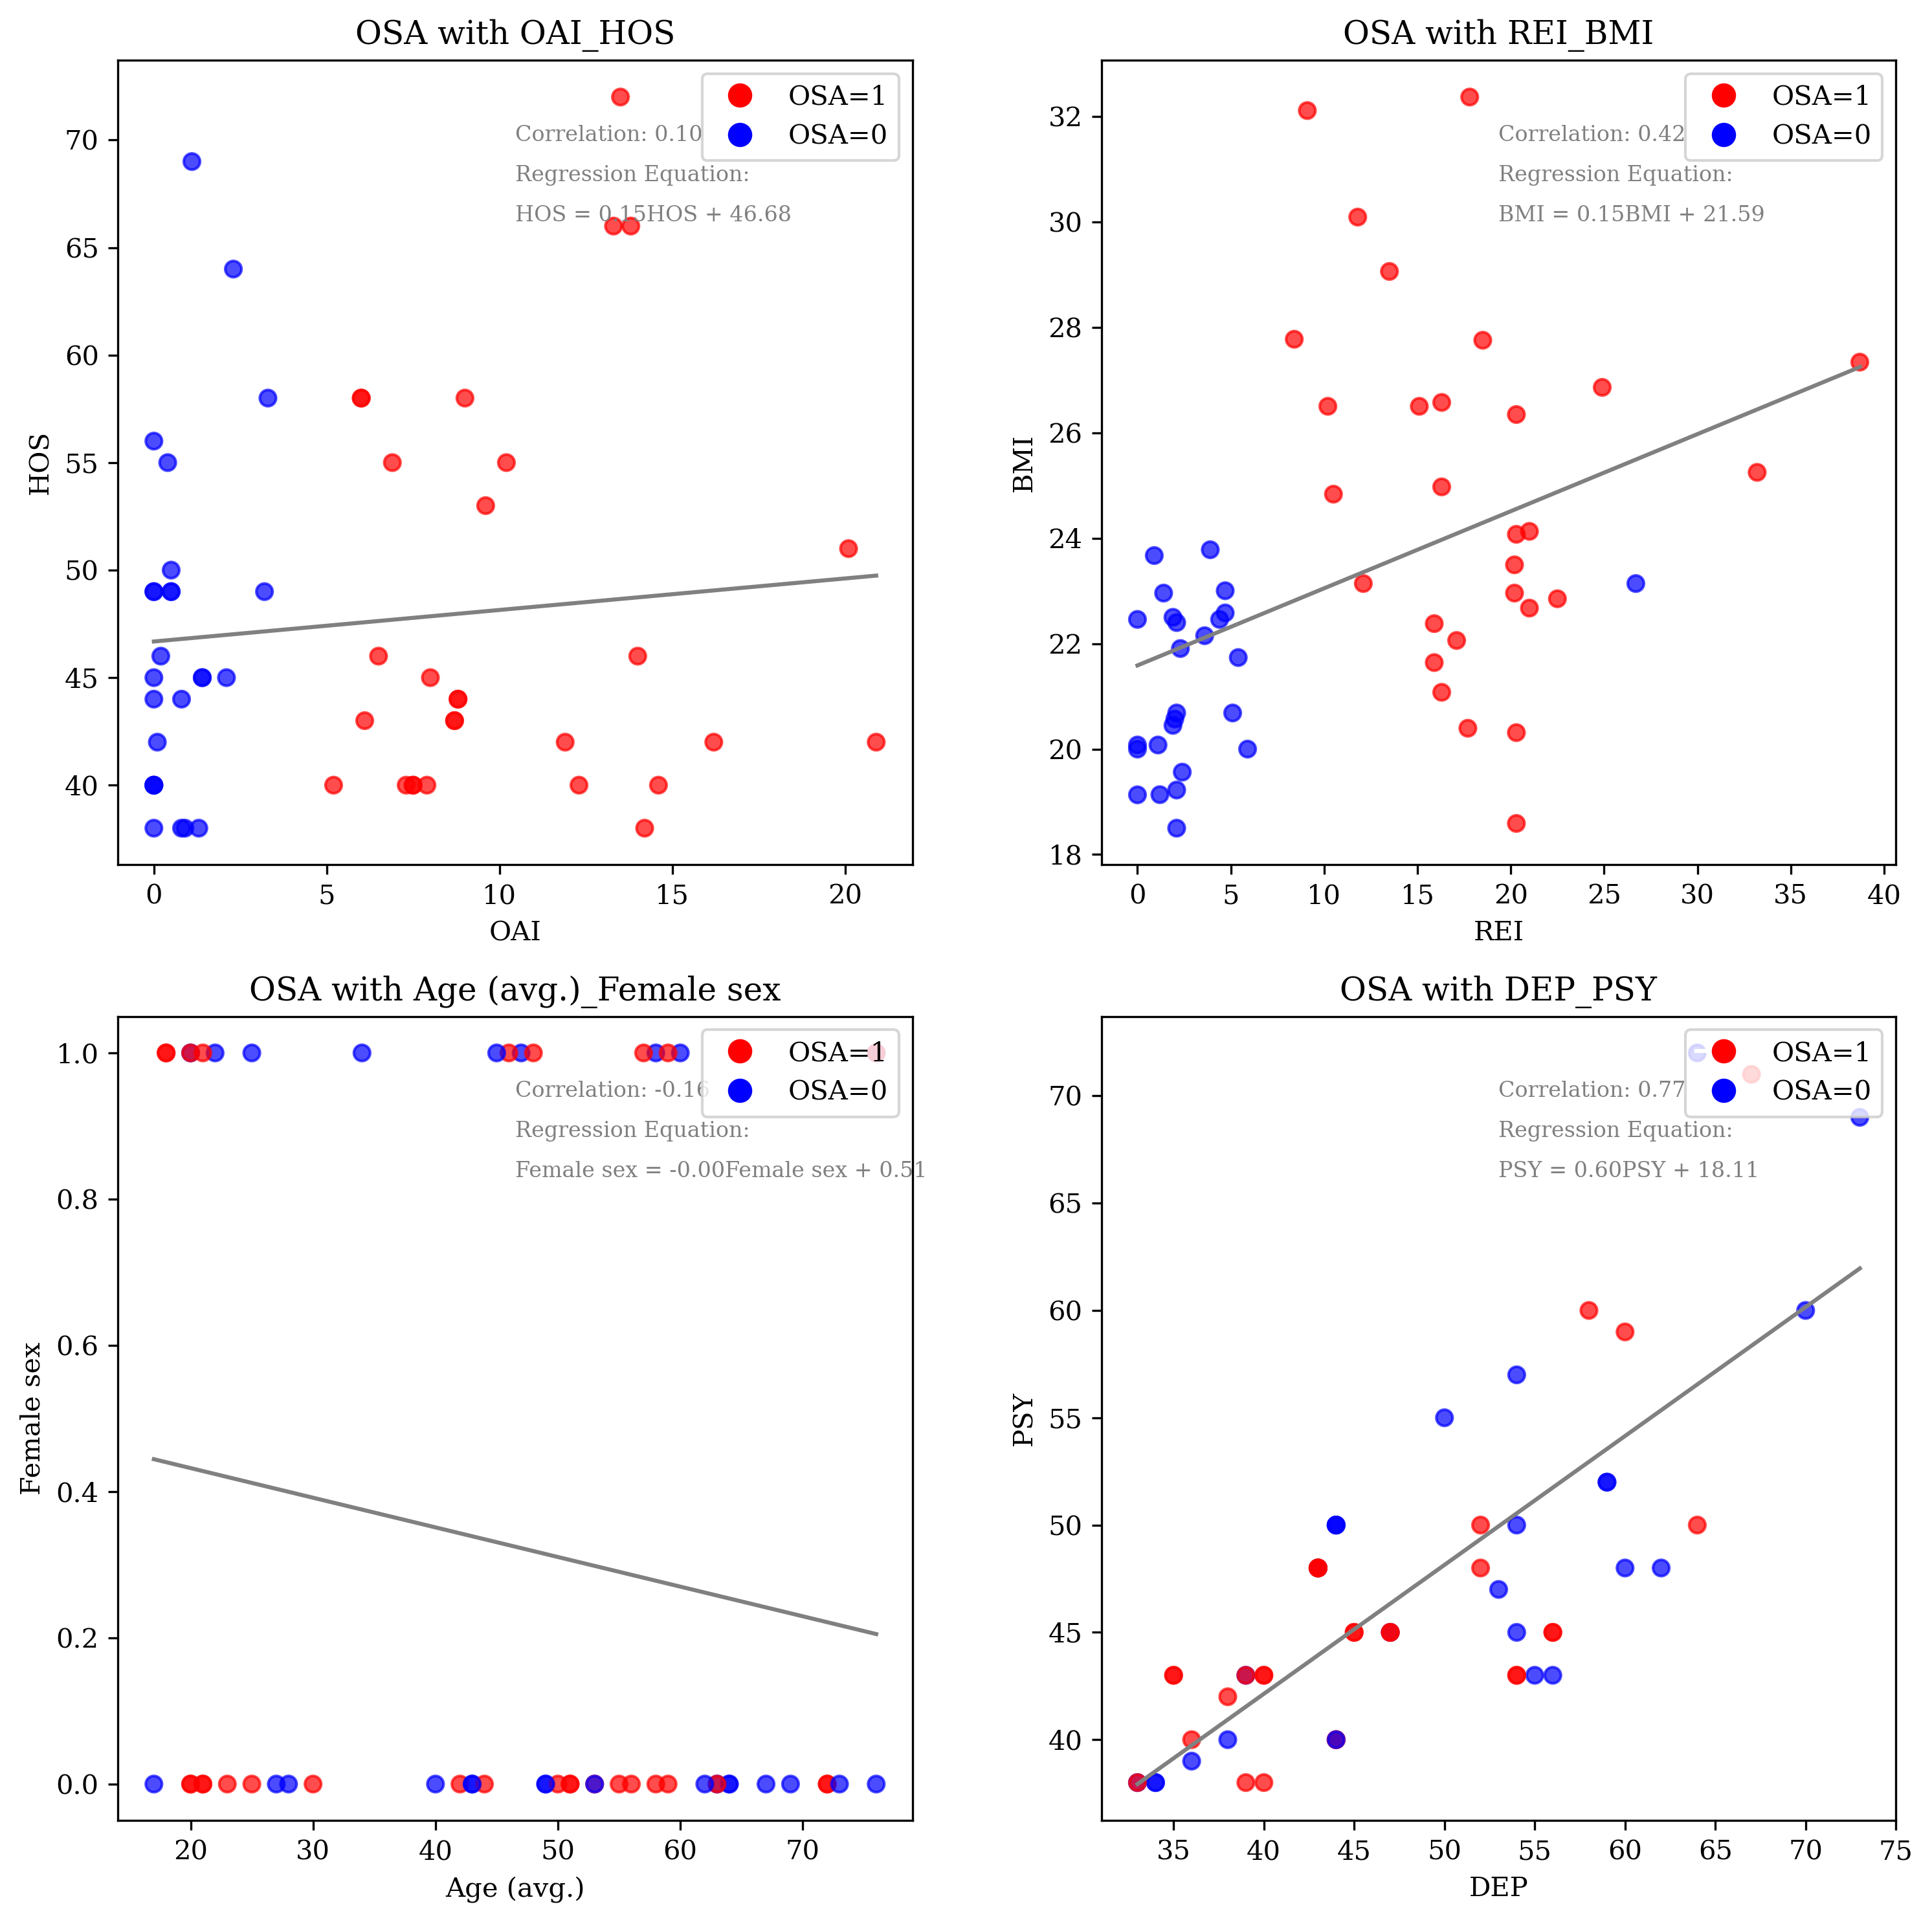

In [42]:
critical_features = df[critical_columns].values
OSA_target = OSA_y[:, 0]
colors = ['red' if label == 1 else 'blue' for label in OSA_target]

plt.figure(figsize=(10, 10), dpi=300)

for i in range(4):
    plt.subplot(2, 2, i + 1)

    # Scatter plot with different colors for OSA labels
    plt.scatter(critical_features[:, i * 2], critical_features[:, i * 2 + 1], color=colors, alpha=0.7)

    # Calculate and plot correlation coefficient
    correlation_coefficient, _ = pearsonr(critical_features[:, i * 2], critical_features[:, i * 2 + 1])
    #plt.text(0.5, 0.9, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes,fontsize=8, color='gray')

    # Train linear regression model for visualization of regression line
    model = LinearRegression()
    model.fit(critical_features[:, i * 2].reshape(-1, 1), critical_features[:, i * 2 + 1])
    
    # Plot regression line
    x_values = np.linspace(min(critical_features[:, i * 2]), max(critical_features[:, i * 2]), 100)
    y_values = model.predict(x_values.reshape(-1, 1))
    plt.plot(x_values, y_values, color='gray')

    # Set labels and title
    plt.xlabel(critical_columns[i * 2], size=10)
    plt.ylabel(critical_columns[i * 2 + 1], size=10)
    
    
    plt.title(f'OSA with {critical_columns[i*2]}_{critical_columns[i*2+1]}', size=12)

    # Create custom legend handles
    legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='OSA=1'),
                      Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='OSA=0')]

    

    # Add annotations for correlation coefficient, weight, and bias
    plt.text(0.5, 0.9, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=8, color='gray')
    plt.text(0.5, 0.85, f'Regression Equation:', transform=plt.gca().transAxes, fontsize=8, color='gray')
    plt.text(0.5, 0.8, f'{critical_columns[i * 2 + 1]} = {model.coef_[0]:.2f}{critical_columns[i * 2 + 1]} + {model.intercept_:.2f}', transform=plt.gca().transAxes, fontsize=8, color='gray')

    # Display the legend
    # Display the legend with custom handles
    plt.legend(handles=legend_handles, loc='upper right')
    

plt.tight_layout()
plt.savefig('./Figures/OSA_with_8features')
plt.show()

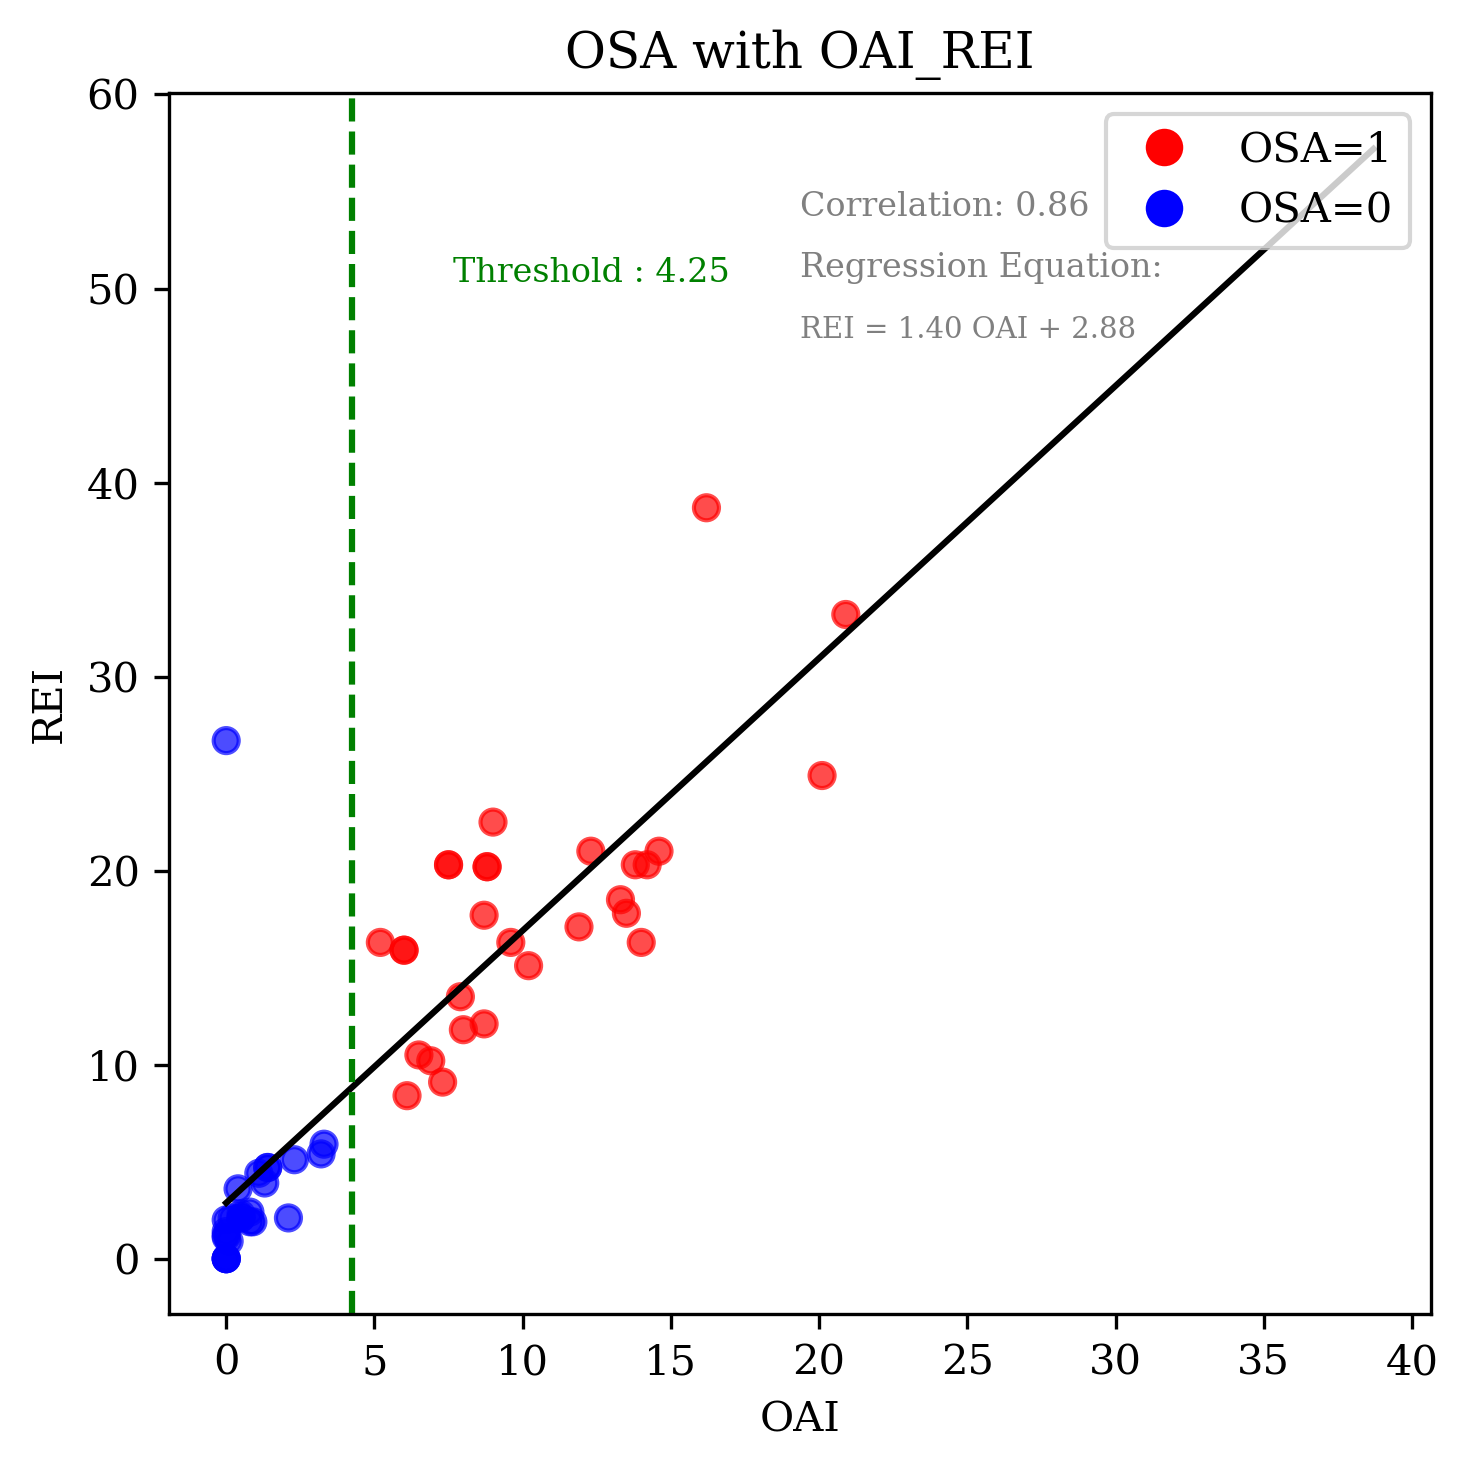

In [43]:


critical_features = df[critical_columns].values
OSA_target = OSA_y[:, 0]
colors = ['red' if label == 1 else 'blue' for label in OSA_target]

plt.figure(figsize=(5, 5), dpi=300)

# Scatter plot with different colors for OSA labels
scatter = plt.scatter(critical_features[:, 0], critical_features[:, 2], color=colors, alpha=0.7)

# Calculate and plot correlation coefficient
correlation_coefficient, _ = pearsonr(critical_features[:, 0], critical_features[:, 2])

# Train linear regression model for visualization of regression line
model = LinearRegression()
model.fit(critical_features[:, 0].reshape(-1, 1), critical_features[:, 2])

# Plot regression line
x_values = np.linspace(min(critical_features[:, 0]), max(critical_features[:, 2]), 100)
y_values = model.predict(x_values.reshape(-1, 1))
plt.plot(x_values, y_values, color='black')

# Set labels and title
plt.xlabel(critical_columns[0], size=10)
plt.ylabel(critical_columns[2], size=10)
plt.title(f'OSA with {critical_columns[0]}_{critical_columns[2]}', size=12)

# Create custom legend handles
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='OSA=1'),
                  Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='OSA=0')]

# Display the legend with custom handles
plt.legend(handles=legend_handles, loc='upper right')

# Add annotations for correlation coefficient, weight, and bias
plt.text(0.5, 0.9, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=8, color='gray')
plt.text(0.5, 0.85, f'Regression Equation:', transform=plt.gca().transAxes, fontsize=8, color='gray')
plt.text(0.5, 0.8, f'REI = {model.coef_[0]:.2f} OAI + {model.intercept_:.2f}', transform=plt.gca().transAxes, fontsize=7, color='gray')

# Draw vertical lines at the threshold values
plt.axvline(x=4.25, color='green', linestyle='--', label='Threshold OAI : 4.25')
#plt.axhline(y=19.36, color='purple', linestyle='--', label='Threshold Y')

# Display the threshold values as text
plt.text(17,50, 'Threshold : 4.25', va='bottom', ha='right', color='green', size = 8)
#plt.text(plt.xlim()[1], 19.36, 'Threshold Y', va='top', ha='left', color='purple')

plt.tight_layout()
plt.savefig('./Figures/OSA_with_OAI_REI')
plt.show()